In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics

In [2]:
from pylab import rcParams
rcParams['figure.figsize']=15,8


# 1. Sparkling wine

# Question 1

In [3]:
#Reading the dataset
spark_wine=pd.read_csv('C:/Users/nicky/Downloads/Sparkling.csv')

In [4]:
#Check data types
spark_wine.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
#Providing inputs to tell pandas that we are working on time series
spark_wine=pd.read_csv('C:/Users/nicky/Downloads/Sparkling.csv',parse_dates=['YearMonth'])

In [6]:
spark_wine.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [7]:
# Making time series reference as index
spark_wine=pd.read_csv('C:/Users/nicky/Downloads/Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [8]:
#checking head of dataset
spark_wine.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [9]:
#Checking for tail of dataset
spark_wine.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [10]:
spark_wine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


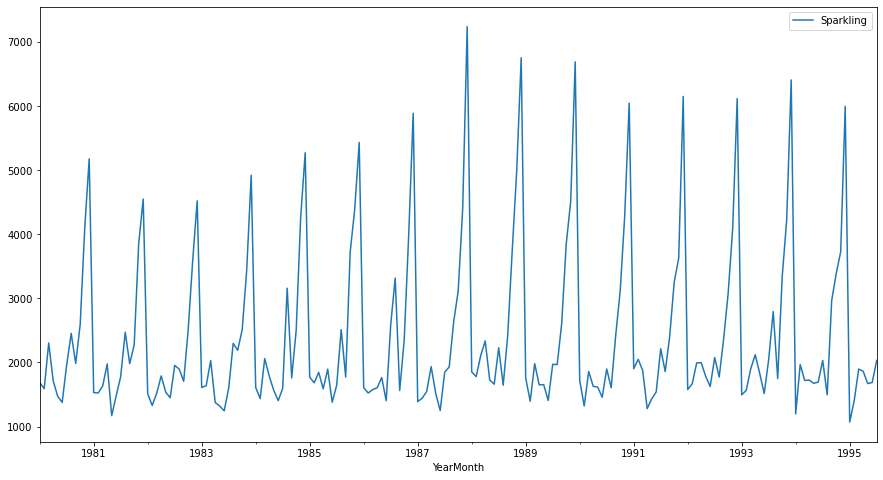

In [11]:
spark_wine.plot()

# Qeuestion 2

In [12]:
#Decompsing time series with additive method
spark_wine_add_decompose=seasonal_decompose(spark_wine,model='additive')

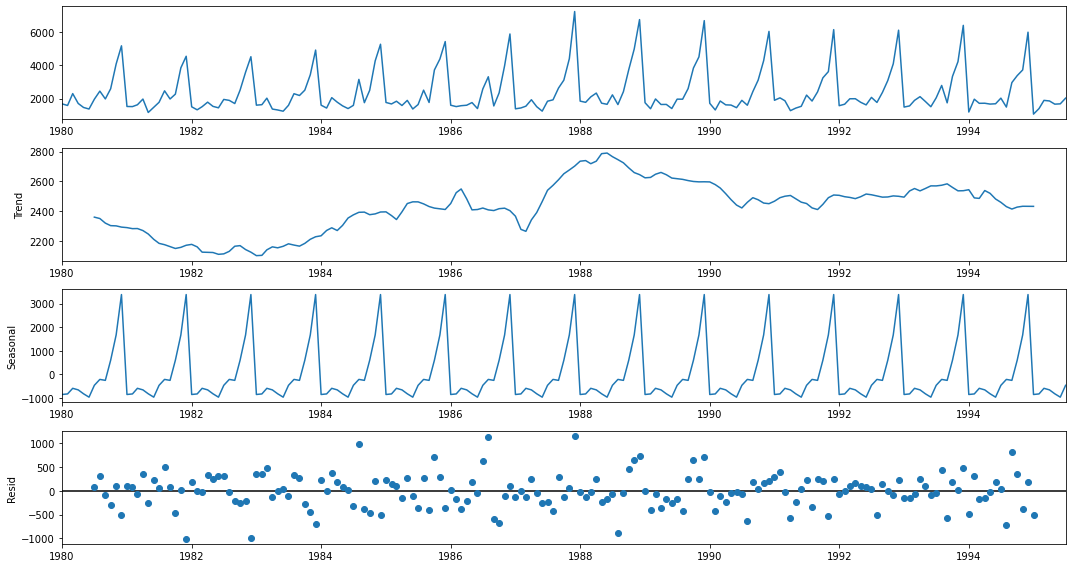

In [13]:
spark_wine_add_decompose.plot()
plt.show()

In [14]:
#Decompsing time series with multiplicative method
spark_wine_multi_decompose=seasonal_decompose(spark_wine,model='multiplicative')

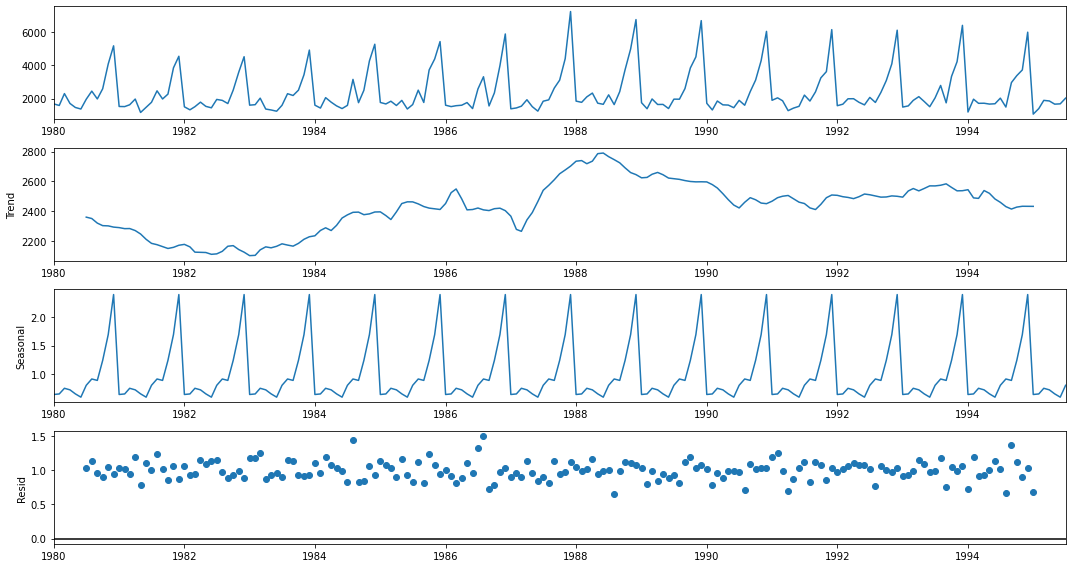

In [15]:
spark_wine_multi_decompose.plot()
plt.show()

# Question 3

In [16]:
# Splitting data into training and testing set
train1=spark_wine['1980-01-01':'1990-12-01']
test1=spark_wine['1991-01-01':]

In [17]:
# Checking shape of training and test data
print(train1.shape)
print(train1.head())
print(test1.shape)
print(test1.head())

(132, 1)
            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
(55, 1)
            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


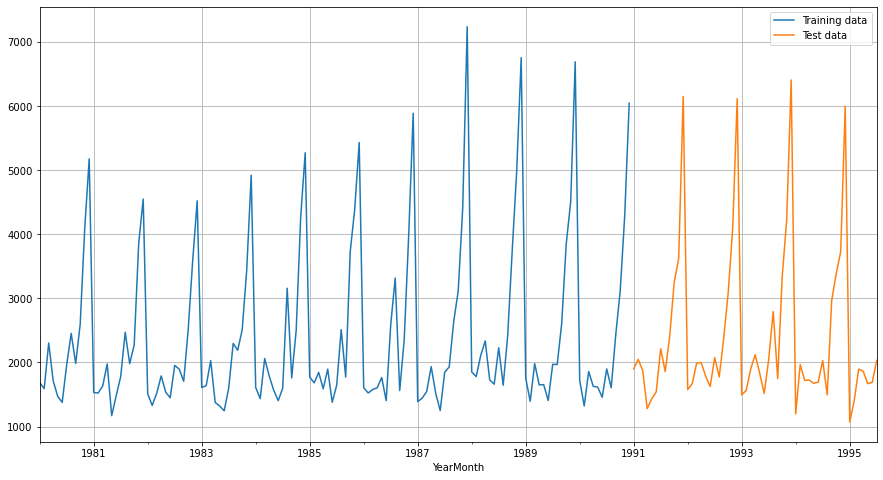

In [18]:
# Visualizing training and test set
train1['Sparkling'].plot()
test1['Sparkling'].plot()
plt.grid()
plt.legend(['Training data','Test data'])
plt.show()

# Question 4

In [19]:
from sklearn.metrics import mean_squared_error
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from IPython.display import display

1) Single exponential smoothing

In [20]:
# Initializing the single exponential smoothing model
model_SES=SimpleExpSmoothing(train1)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [21]:
# Fitting the training data into the model
model_SES=model_SES.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [22]:
#Checking params
model_SES.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
# Forecasting on the test set
SES_predict=model_SES.forecast(steps=len(test1))
SES_predict

1991-01-01    2403.790103
1991-02-01    2403.790103
1991-03-01    2403.790103
1991-04-01    2403.790103
1991-05-01    2403.790103
1991-06-01    2403.790103
1991-07-01    2403.790103
1991-08-01    2403.790103
1991-09-01    2403.790103
1991-10-01    2403.790103
1991-11-01    2403.790103
1991-12-01    2403.790103
1992-01-01    2403.790103
1992-02-01    2403.790103
1992-03-01    2403.790103
1992-04-01    2403.790103
1992-05-01    2403.790103
1992-06-01    2403.790103
1992-07-01    2403.790103
1992-08-01    2403.790103
1992-09-01    2403.790103
1992-10-01    2403.790103
1992-11-01    2403.790103
1992-12-01    2403.790103
1993-01-01    2403.790103
1993-02-01    2403.790103
1993-03-01    2403.790103
1993-04-01    2403.790103
1993-05-01    2403.790103
1993-06-01    2403.790103
1993-07-01    2403.790103
1993-08-01    2403.790103
1993-09-01    2403.790103
1993-10-01    2403.790103
1993-11-01    2403.790103
1993-12-01    2403.790103
1994-01-01    2403.790103
1994-02-01    2403.790103
1994-03-01  

Text(0.5, 1.0, 'SES Prediction')

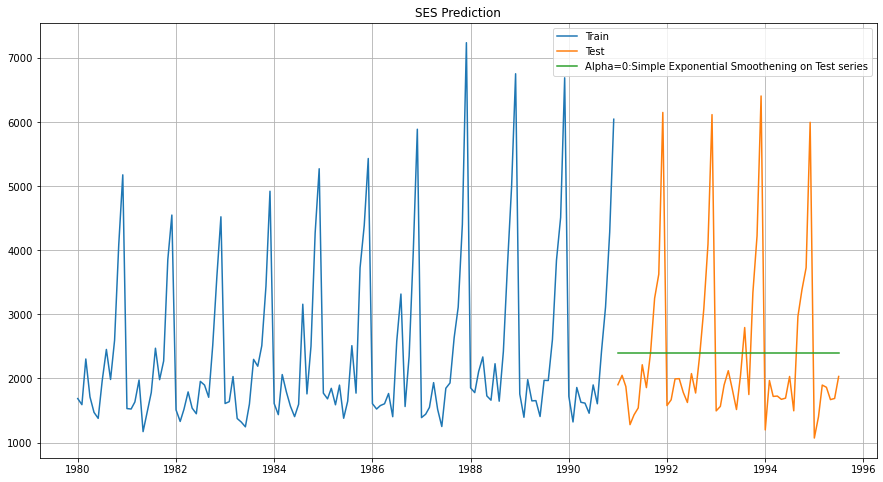

In [24]:
# Plotting training set, testing set and forecast values
plt.plot(train1,label='Train')
plt.plot(test1,label='Test')
plt.plot(SES_predict,label='Alpha=0:Simple Exponential Smoothening on Test series')
plt.legend(loc='best')
plt.grid()
plt.title('SES Prediction')

In [25]:
# Checking root mean squared error
SES_RMSE=np.round(metrics.mean_squared_error(test1.values,SES_predict.values,squared=False),2)
SES_RMSE

1275.08

In [26]:
resultsDf = pd.DataFrame({'Test RMSE': [SES_RMSE]},index=['Alpha=0,SES'])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08


2) Double exponential smoothing/ HOLT exponential smoothing

In [27]:
# Initializing the Double exponential smoothing model
model_DES=Holt(train1)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [28]:
# Fitting taining data into the model
model_DES=model_DES.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [29]:
# Checking for parameters
model_DES.params

{'smoothing_level': 0.6477793434322846,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083818806434,
 'initial_slope': 27.072937320155905,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
# Forecasting on the test set
DES_predict=model_DES.forecast(len(test1))
DES_predict

1991-01-01    5281.422097
1991-02-01    5308.495035
1991-03-01    5335.567972
1991-04-01    5362.640909
1991-05-01    5389.713846
1991-06-01    5416.786784
1991-07-01    5443.859721
1991-08-01    5470.932658
1991-09-01    5498.005596
1991-10-01    5525.078533
1991-11-01    5552.151470
1991-12-01    5579.224408
1992-01-01    5606.297345
1992-02-01    5633.370282
1992-03-01    5660.443220
1992-04-01    5687.516157
1992-05-01    5714.589094
1992-06-01    5741.662032
1992-07-01    5768.734969
1992-08-01    5795.807906
1992-09-01    5822.880844
1992-10-01    5849.953781
1992-11-01    5877.026718
1992-12-01    5904.099656
1993-01-01    5931.172593
1993-02-01    5958.245530
1993-03-01    5985.318468
1993-04-01    6012.391405
1993-05-01    6039.464342
1993-06-01    6066.537279
1993-07-01    6093.610217
1993-08-01    6120.683154
1993-09-01    6147.756091
1993-10-01    6174.829029
1993-11-01    6201.901966
1993-12-01    6228.974903
1994-01-01    6256.047841
1994-02-01    6283.120778
1994-03-01  

Text(0.5, 1.0, ' DES Prediction')

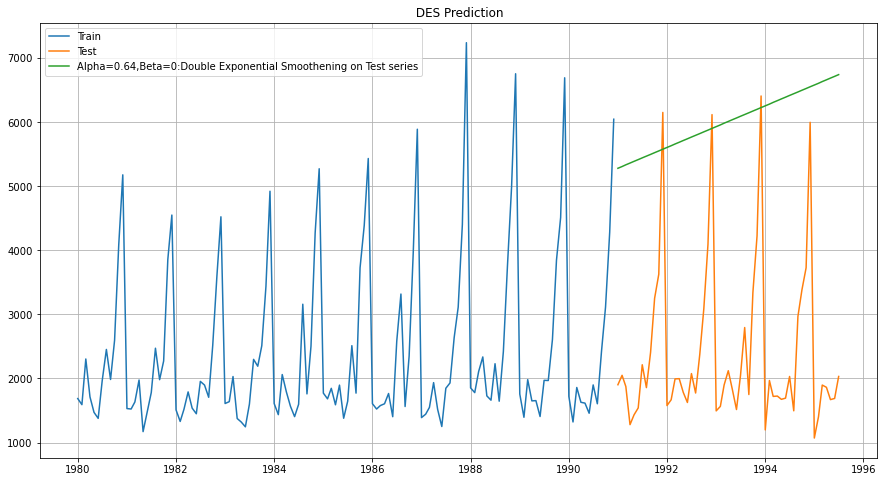

In [31]:
# Plotting training set, test set and forecast values
plt.plot(train1,label='Train')
plt.plot(test1,label='Test')
plt.plot(DES_predict,label='Alpha=0.64,Beta=0:Double Exponential Smoothening on Test series')
plt.legend(loc='best')
plt.grid()
plt.title(' DES Prediction')

In [32]:
#RMSE using statsmodels
DES_RMSE=np.round(metrics.mean_squared_error(test1.values,DES_predict.values,squared=False))
DES_RMSE

3851.0

In [33]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [DES_RMSE]}
                           ,index=['Alpha=0.64,Beta=0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08
"Alpha=0.64,Beta=0:DES",3851.00


3)Triple exponential smoothing with Additive seasonality/ HOLTS-Winters exponential smoothing

In [34]:
# Initializing the triple exponential smooyhing model
model1_TES=ExponentialSmoothing(train1,trend='additive',seasonal='additive')

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [35]:
# Fitting the training set into the model
model1_TES=model1_TES.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [36]:
# Checking the paramters
model1_TES.params

{'smoothing_level': 0.08620807620652111,
 'smoothing_slope': 2.5318127264805285e-10,
 'smoothing_seasonal': 0.4763318881970767,
 'damping_slope': nan,
 'initial_level': 1684.856831619659,
 'initial_slope': 0.006547258914785458,
 'initial_seasons': array([  39.18349969,  -37.78583681,  464.67331107,  206.1306033 ,
        -141.07452355, -157.23487797,  338.09368962,  856.86721657,
         403.58906901,  971.28204491, 2401.59300214, 3426.63695382]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
# Forecasting the model on test set
TES_predict1=model1_TES.forecast(len(test1))
TES_predict1

1991-01-01    1532.447311
1991-02-01    1241.418545
1991-03-01    1726.805458
1991-04-01    1584.356020
1991-05-01    1494.048198
1991-06-01    1311.504612
1991-07-01    1834.897485
1991-08-01    1696.214495
1991-09-01    2338.942704
1991-10-01    3249.329612
1991-11-01    4324.483729
1991-12-01    6461.426818
1992-01-01    1532.525878
1992-02-01    1241.497112
1992-03-01    1726.884025
1992-04-01    1584.434587
1992-05-01    1494.126765
1992-06-01    1311.583179
1992-07-01    1834.976052
1992-08-01    1696.293062
1992-09-01    2339.021271
1992-10-01    3249.408179
1992-11-01    4324.562297
1992-12-01    6461.505385
1993-01-01    1532.604445
1993-02-01    1241.575679
1993-03-01    1726.962593
1993-04-01    1584.513154
1993-05-01    1494.205332
1993-06-01    1311.661746
1993-07-01    1835.054619
1993-08-01    1696.371629
1993-09-01    2339.099838
1993-10-01    3249.486746
1993-11-01    4324.640864
1993-12-01    6461.583952
1994-01-01    1532.683012
1994-02-01    1241.654246
1994-03-01  

Text(0.5, 1.0, 'TES Prediction with additive seasonality')

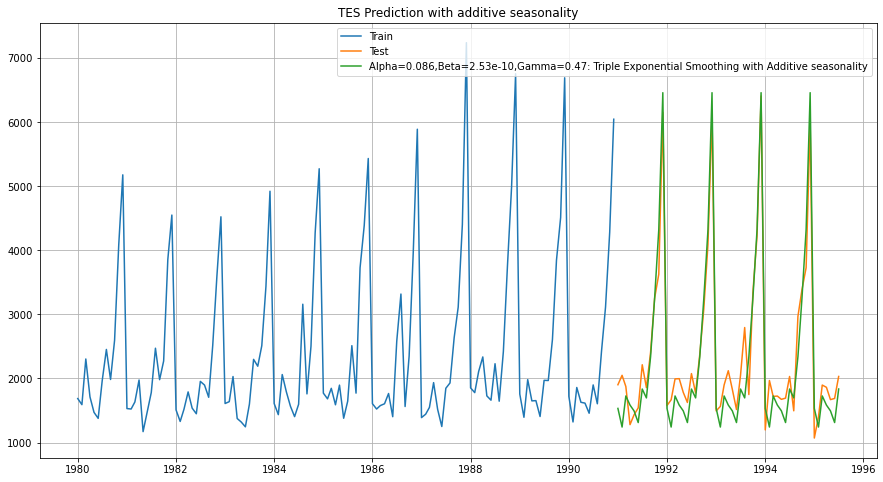

In [38]:
# Plotting training set,test set and forecasted values
plt.plot(train1,label='Train')
plt.plot(test1,label='Test')
plt.plot(TES_predict1,label='Alpha=0.086,Beta=2.53e-10,Gamma=0.47: Triple Exponential Smoothing with Additive seasonality')
plt.legend(loc='best')
plt.grid()
plt.title( 'TES Prediction with additive seasonality')

In [39]:
# Checking RMSE
TES_RMSE1= np.round(mean_squared_error(test1.values,TES_predict1.values,squared=False),2)
TES_RMSE1

362.72

In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE1]}
                           ,index=['Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08
"Alpha=0.64,Beta=0:DES",3851.00
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.72


4) Triple Exponential Smoothing with Multiplicative seasonality

In [41]:
# Initializing the triple exponential smoothing model
model2_TES=ExponentialSmoothing(train1,trend='additive',seasonal='multiplicative')

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
# Fitting training set into the model
model2_TES=model2_TES.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [43]:
# Checking the parameters
model2_TES.params

{'smoothing_level': 0.15422215345902165,
 'smoothing_slope': 2.6836273360597693e-21,
 'smoothing_seasonal': 0.37132238239976756,
 'damping_slope': nan,
 'initial_level': 1639.9993318334934,
 'initial_slope': 4.848983218641197,
 'initial_seasons': array([1.00842014, 0.96898448, 1.24179403, 1.1320575 , 0.93981009,
        0.93811201, 1.2245818 , 1.54428852, 1.27336069, 1.6319816 ,
        2.48292921, 3.11861884]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
# Forecating the model on test set
TES_predict2=model2_TES.forecast(len(test1))
TES_predict2

1991-01-01    1602.190344
1991-02-01    1373.887030
1991-03-01    1807.440446
1991-04-01    1704.576312
1991-05-01    1602.379889
1991-06-01    1415.484923
1991-07-01    1944.861259
1991-08-01    1910.071080
1991-09-01    2435.212365
1991-10-01    3333.474757
1991-11-01    4407.806636
1991-12-01    6328.571249
1992-01-01    1656.067641
1992-02-01    1419.958005
1992-03-01    1867.881003
1992-04-01    1761.418707
1992-05-01    1655.666268
1992-06-01    1462.426115
1992-07-01    2009.180210
1992-08-01    1973.065868
1992-09-01    2515.306362
1992-10-01    3442.812876
1992-11-01    4551.988789
1992-12-01    6535.020076
1993-01-01    1709.944938
1993-02-01    1466.028980
1993-03-01    1928.321560
1993-04-01    1818.261101
1993-05-01    1708.952647
1993-06-01    1509.367307
1993-07-01    2073.499161
1993-08-01    2036.060655
1993-09-01    2595.400358
1993-10-01    3552.150995
1993-11-01    4696.170942
1993-12-01    6741.468903
1994-01-01    1763.822235
1994-02-01    1512.099955
1994-03-01  

Text(0.5, 1.0, 'TES Prediction with multiplicative seasonality')

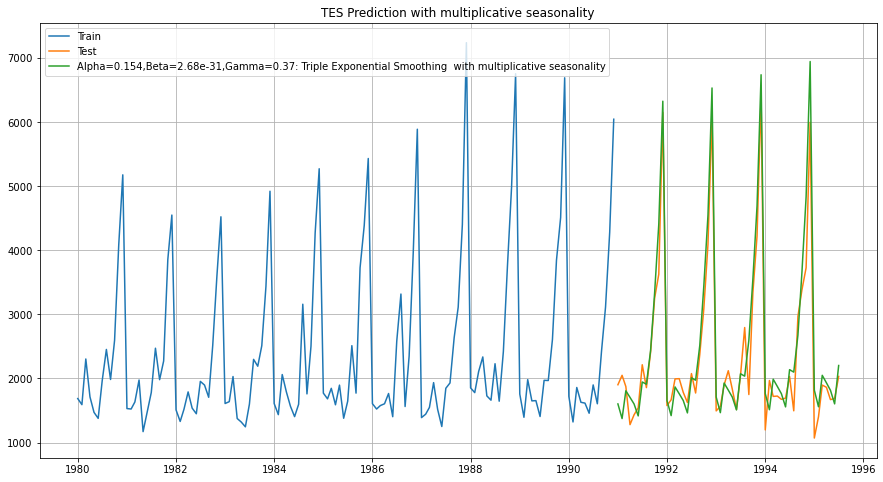

In [45]:
# Plotting training set, testing set and forecasted values
plt.plot(train1,label='Train')
plt.plot(test1,label='Test')
plt.plot(TES_predict2,label='Alpha=0.154,Beta=2.68e-31,Gamma=0.37: Triple Exponential Smoothing  with multiplicative seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('TES Prediction with multiplicative seasonality')

In [46]:
# Checking RMSE
TES_RMSE2=np.round(metrics.mean_squared_error(test1.values,TES_predict2.values,squared=False))
TES_RMSE2

383.0

In [47]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE2]}
                           ,index=['Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08
"Alpha=0.64,Beta=0:DES",3851.00
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.72
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.00


5) Linear Regression model

In [48]:
print(spark_wine.shape)
print(train1.shape)
print(test1.shape)

(187, 1)
(132, 1)
(55, 1)


In [49]:
# Modifying training and test set bfore fitting it into regression model
train1_time=[i+1 for i in range(len(train1))]
test1_time=[i+133 for i in range(len(test1))]
print('Training time instance','\n',train1_time)
print('Testing time instance','\n',test1_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Testing time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [50]:
LinearRegression_train1=train1.copy()
LinearRegression_test1=test1.copy()

In [51]:
LinearRegression_train1['Time']=train1_time
LinearRegression_test1['Time']=test1_time

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# Initializing linear regression model
spark_lr=LinearRegression()

In [54]:
# Fitting test data into linear regression model
spark_lr.fit(LinearRegression_train1[['Time']],LinearRegression_train1['Sparkling'])

LinearRegression()

Text(0.5, 1.0, 'Linear Regression model')

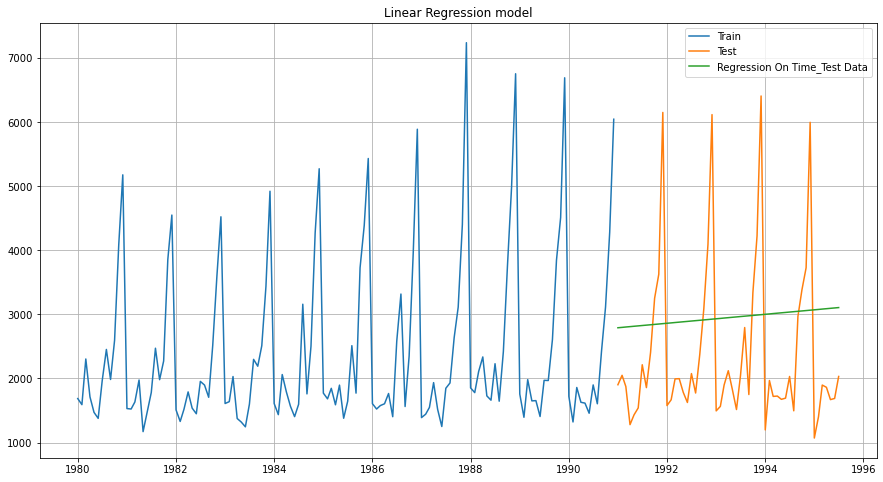

In [55]:
# Forecasting model on to test dat
spark_lr_train_predict= spark_lr.predict(LinearRegression_train1[['Time']])
LinearRegression_train1['Regontime']=spark_lr_train_predict
spark_lr_test_predict=spark_lr.predict(LinearRegression_test1[['Time']])
LinearRegression_test1['Regontime']=spark_lr_test_predict


# Plotting train set, test set and forcasted values of linear regression model 
plt.plot( train1['Sparkling'], label='Train')
plt.plot(test1['Sparkling'], label='Test')
plt.plot(LinearRegression_test1['Regontime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid()
plt.title('Linear Regression model')



In [56]:
# RMSE Score
LR_RMSE=np.round(mean_squared_error(test1['Sparkling'],spark_lr_test_predict,squared=False))
LR_RMSE

1389.0

In [57]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [LR_RMSE]}
                           ,index=['Linear Regression model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08
"Alpha=0.64,Beta=0:DES",3851.00
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.72
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.00
Linear Regression model,1389.00


6)Naive Approach

In [58]:
# Making a copy of train and test set
NaiveModel_train=train1.copy()
NaiveModel_test=test1.copy()

In [59]:
train1.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [60]:
NaiveModel_test['Naive']=6047
NaiveModel_test.head()

,Sparkling,Naive
YearMonth,,
1991-01-01,1902,6047
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047


Text(0.5, 1.0, 'Naive Forecast')

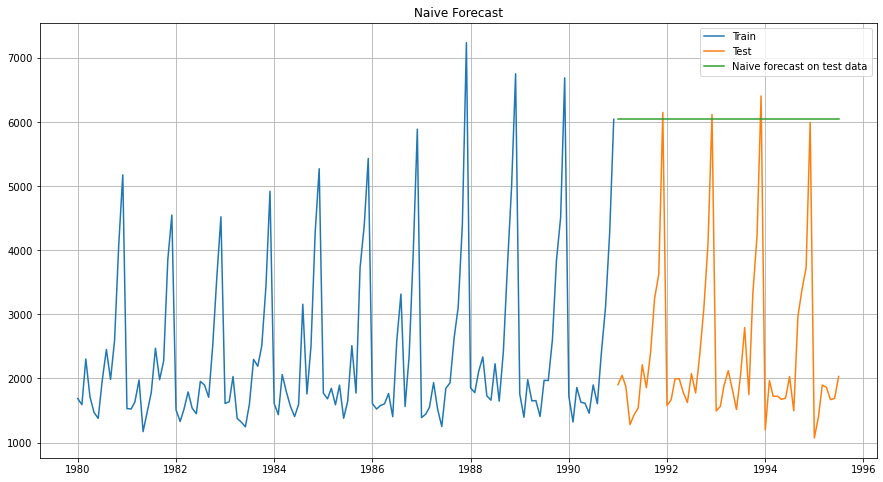

In [61]:
# Plotting train set, test set and forecasted values
plt.plot(NaiveModel_train['Sparkling'],label='Train')
plt.plot(NaiveModel_test['Sparkling'],label='Test')
plt.plot(NaiveModel_test['Naive'],label='Naive forecast on test data')
plt.legend(loc='best')
plt.grid()
plt.title('Naive Forecast')

In [62]:
# RMSE 
NAIVE_RMSE=np.round(metrics.mean_squared_error(test1['Sparkling'],NaiveModel_test['Naive'],squared=False))
NAIVE_RMSE

3864.0

In [63]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [NAIVE_RMSE]}
                           ,index=['Naive model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.08
"Alpha=0.64,Beta=0:DES",3851.00
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.72
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.00
Linear Regression model,1389.00
Naive model,3864.00


7) Simple Average

In [64]:
# Making copy of train set and test set
SimpleAverage_train=train1.copy()
SimpleAverage_test=test1.copy()

In [65]:
# Taking average mean for forecast
SimpleAverage_test['mean forecast']=train1['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


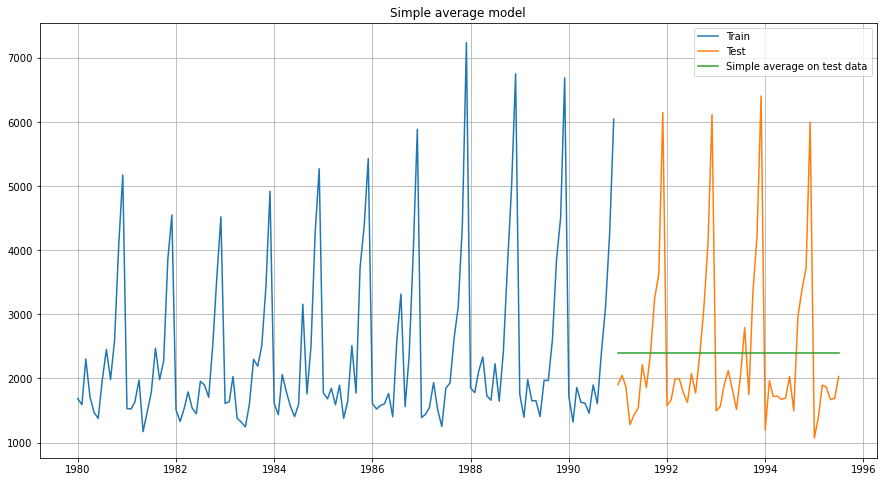

In [66]:
# Plotting train set, test set and forecast done by average mean model on test set
plt.plot(SimpleAverage_train['Sparkling'],label='Train')
plt.plot(SimpleAverage_test['Sparkling'],label='Test')
plt.plot(SimpleAverage_test['mean forecast'],label='Simple average on test data')
plt.legend(loc='best')
plt.grid()
plt.title('Simple average model')
plt.show()

In [67]:
# RMSE
SIMPLEAVERAGE_RMSE=metrics.mean_squared_error(test1['Sparkling'],SimpleAverage_test['mean forecast'],squared=False)
SIMPLEAVERAGE_RMSE

1275.0818036965309

In [68]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [SIMPLEAVERAGE_RMSE]}
                           ,index=['Simple average model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804


# Question 5

In [69]:
from statsmodels.tsa.stattools import adfuller

i) Stationarity of Original time series

In [70]:
# Checking for stationarity of complete dataset by p value
spark_winetest=adfuller(spark_wine,regression='ct')
print('P Value : ',spark_winetest[1])

P Value :  0.7055958459932644


In [71]:
# Taking 1 level of differencing to check if data becomes stationary
spark_winetest=adfuller(spark_wine.diff().dropna(),regression='ct')
print('P Value : ',spark_winetest[1])

P Value :  0.0


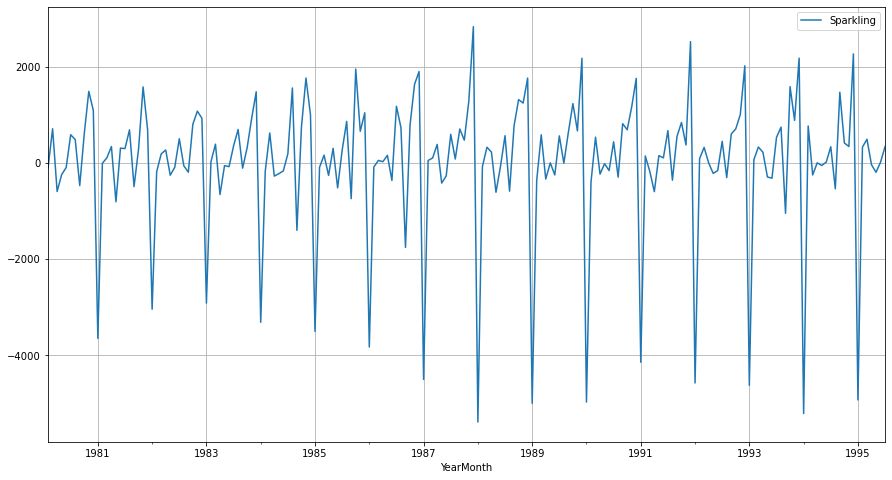

In [72]:
# Plotting stationary series
spark_wine.diff().dropna().plot(grid=True)

ii) Stationarity of train data set

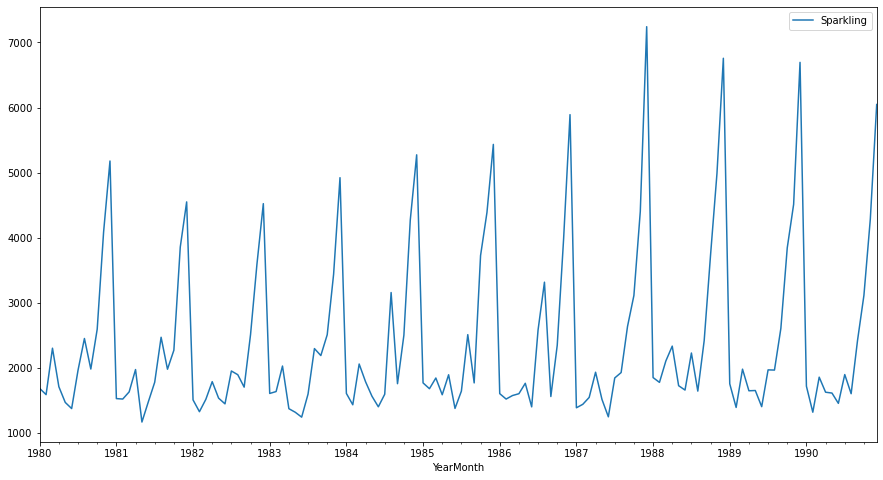

In [73]:
#Plotting tain data
train1.plot()

In [74]:
# Checking if train data is stationary
train1test=adfuller(train1,regression='ct')
print('P Value : ',train1test[1])

P Value :  0.5674110388593733


In [75]:
# Taking 1 level of differencing to check if train set becomes stationary
train1test=adfuller(train1.diff().dropna(),regression='ct')
print('P Value : ',train1test[1])

P Value :  8.479210655513869e-11


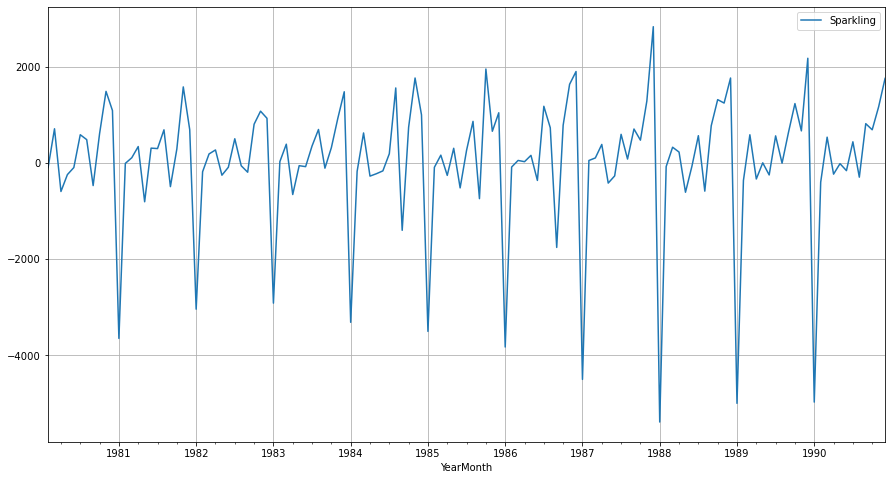

In [76]:
# Plotting stationary train set
train1.diff().dropna().plot(grid=True)

iii)Stationarity of test data set

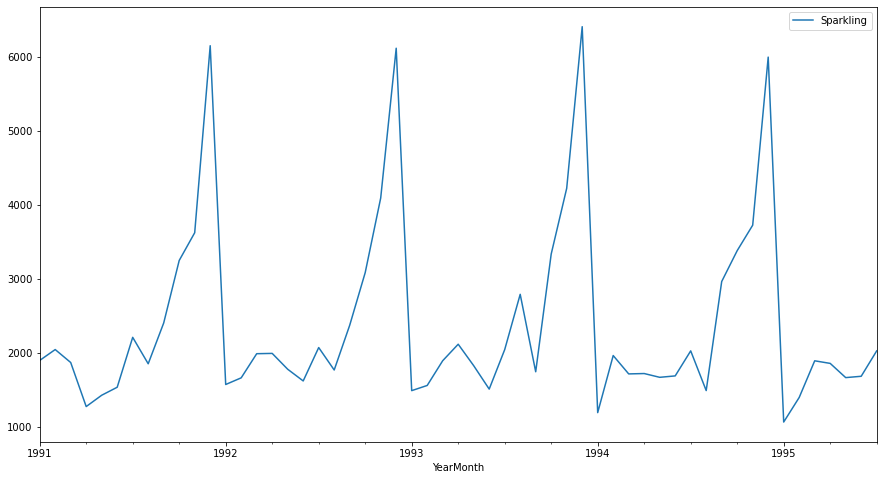

In [77]:
#Plotting test data
test1.plot()

In [78]:
# Checking if train data is stationary by checking p value
test1test=adfuller(test1,regression='ct')
print('P Value : ',test1test[1])

P Value :  0.7189136370409676


In [79]:
# Taking 1 level of differencing to check if train set becomes stationary
test1test=adfuller(test1.diff().dropna(),regression='ct')
print('P Value : ',test1test[1])

P Value :  4.282873768514367e-09


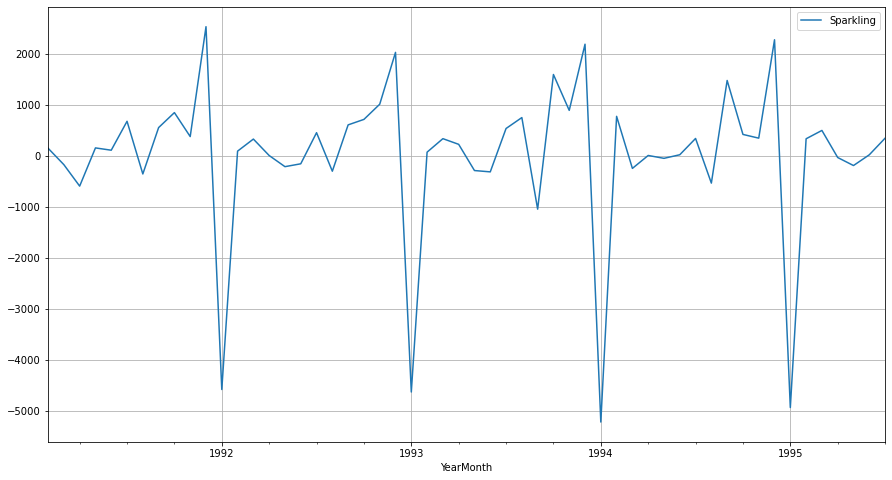

In [80]:
# Plotting stationary train set
test1.diff().dropna().plot(grid=True)

# Question 6

In [81]:
import itertools


1) Atomated ARIMA model

In [82]:
# Forming a loop  to help us in getting a combination of different parameters of p and q in the range of 0 and 4
##  The value of d is 1 as we need to take a difference of the series to make it stationary.
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
print('parameters combination for the model')
for i in range(0,len(pdq)):
    print('Model : {}'.format(pdq[i]))

parameters combination for the model
Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [83]:
# Creating an empty dataframe with column names only
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])
ARIMA_AIC

,param,AIC


In [84]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train1['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155838333
ARIMA(0, 1, 2) - AIC:2234.4083230985857
ARIMA(0, 1, 3) - AIC:2233.994870709028
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.7550930351904


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.6958935277153
ARIMA(1, 1, 3) - AIC:2235.6078099325528
ARIMA(2, 1, 0) - AIC:2260.3657439680937
ARIMA(2, 1, 1) - AIC:2233.777625205564
ARIMA(2, 1, 2) - AIC:2213.5092135857103


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 3) - AIC:2232.8032525488015
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.1675513234286


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(3, 1, 2) - AIC:2230.819322476349
ARIMA(3, 1, 3) - AIC:2221.6376421251452


In [85]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509214
15,"(3, 1, 3)",2221.637642
14,"(3, 1, 2)",2230.819322
11,"(2, 1, 3)",2232.803253
9,"(2, 1, 1)",2233.777625


In [86]:
auto_ARIMA1=ARIMA(train1,order=(2,1,2))
auto_ARIMA1=auto_ARIMA1.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


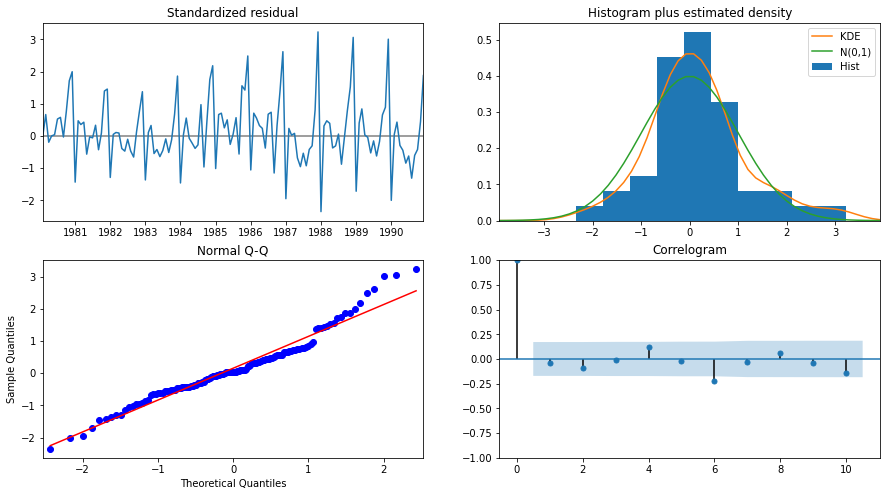

In [87]:
auto_ARIMA1.plot_diagnostics()
plt.plot();

In [88]:
auto_ARIMA1_predict=auto_ARIMA1.forecast(steps=(len(test1)))

In [89]:
ARIMA_RMSE=np.round(metrics.mean_squared_error(test1['Sparkling'],auto_ARIMA1_predict,squared=False),2)
ARIMA_RMSE

1299.98

In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [ARIMA_RMSE]}
                           ,index=['AUTO ARIMA model(order=(2,1,2))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804
"AUTO ARIMA model(order=(2,1,2))",1299.980000


2) Automated SARIMA model

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

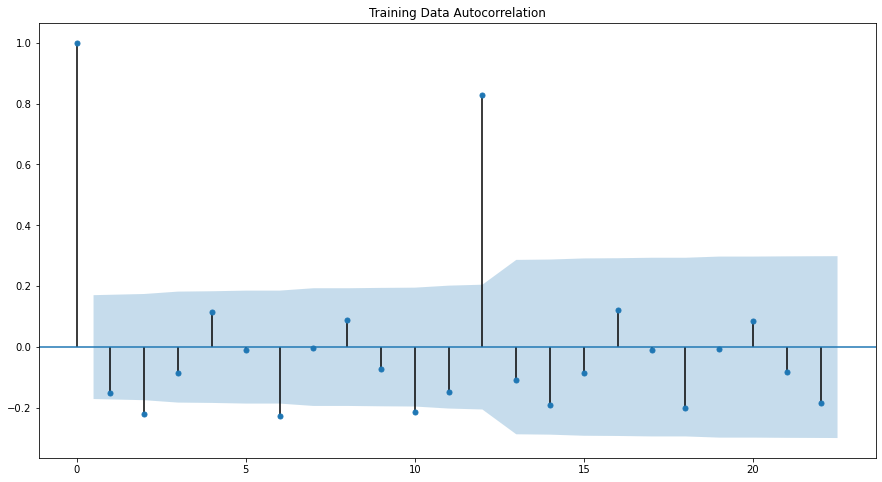

In [92]:
plot_acf(train1.diff(),title='Training Data Autocorrelation',missing='drop')
plt.show()

In [93]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, D, q))]
print(' parameter combinations for the Model ')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

 parameter combinations for the Model 
Model: (0, 1, 1)(0, 0, 1, 11)
Model: (0, 1, 2)(0, 0, 2, 11)
Model: (0, 1, 3)(0, 0, 3, 11)
Model: (1, 1, 0)(1, 0, 0, 11)
Model: (1, 1, 1)(1, 0, 1, 11)
Model: (1, 1, 2)(1, 0, 2, 11)
Model: (1, 1, 3)(1, 0, 3, 11)
Model: (2, 1, 0)(2, 0, 0, 11)
Model: (2, 1, 1)(2, 0, 1, 11)
Model: (2, 1, 2)(2, 0, 2, 11)
Model: (2, 1, 3)(2, 0, 3, 11)
Model: (3, 1, 0)(3, 0, 0, 11)
Model: (3, 1, 1)(3, 0, 1, 11)
Model: (3, 1, 2)(3, 0, 2, 11)
Model: (3, 1, 3)(3, 0, 3, 11)


In [94]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [95]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=50)    
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 11) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 11) - AIC:2058.68652627132
SARIMA(0, 1, 0)x(0, 0, 2, 11) - AIC:1869.992348338849


C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 0)x(1, 0, 0, 11) - AIC:2084.453999981115
SARIMA(0, 1, 0)x(1, 0, 1, 11) - AIC:2050.2290290128917
SARIMA(0, 1, 0)x(1, 0, 2, 11) - AIC:1870.151474253327


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 0, 3, 11) - AIC:1761.1841362807475
SARIMA(0, 1, 0)x(2, 0, 0, 11) - AIC:1891.0694320028572
SARIMA(0, 1, 0)x(2, 0, 1, 11) - AIC:1890.420150226435
SARIMA(0, 1, 0)x(2, 0, 2, 11) - AIC:1871.9559044928626


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 0, 3, 11) - AIC:2044.5151823957146
SARIMA(0, 1, 0)x(3, 0, 0, 11) - AIC:1705.264375587662
SARIMA(0, 1, 0)x(3, 0, 1, 11) - AIC:1706.9848095528077
SARIMA(0, 1, 0)x(3, 0, 2, 11) - AIC:1710.4771852353329


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 3, 11) - AIC:1931.0155159807466
SARIMA(0, 1, 1)x(0, 0, 0, 11) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 11) - AIC:2022.7466256238374
SARIMA(0, 1, 1)x(0, 0, 2, 11) - AIC:1851.3722948809116


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 1)x(1, 0, 0, 11) - AIC:2063.498770581841
SARIMA(0, 1, 1)x(1, 0, 1, 11) - AIC:2024.2348189083286
SARIMA(0, 1, 1)x(1, 0, 2, 11) - AIC:1850.7098351188429


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 1)x(2, 0, 0, 11) - AIC:1874.082271843519
SARIMA(0, 1, 1)x(2, 0, 1, 11) - AIC:1870.761110921895
SARIMA(0, 1, 1)x(2, 0, 2, 11) - AIC:1857.8937472688551


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 1)x(3, 0, 0, 11) - AIC:1706.4216310369152
SARIMA(0, 1, 1)x(3, 0, 1, 11) - AIC:1684.7985761911207
SARIMA(0, 1, 1)x(3, 0, 2, 11) - AIC:1710.317587446395


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 2)x(0, 0, 0, 11) - AIC:2187.4410102201036
SARIMA(0, 1, 2)x(0, 0, 1, 11) - AIC:2003.8316377193764
SARIMA(0, 1, 2)x(0, 0, 2, 11) - AIC:1822.0254159259011


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 2)x(1, 0, 0, 11) - AIC:2054.4334136546204
SARIMA(0, 1, 2)x(1, 0, 1, 11) - AIC:2003.125222191938
SARIMA(0, 1, 2)x(1, 0, 2, 11) - AIC:1823.8958921659214


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 2)x(2, 0, 0, 11) - AIC:1872.1061393959762
SARIMA(0, 1, 2)x(2, 0, 1, 11) - AIC:1875.4692022500349
SARIMA(0, 1, 2)x(2, 0, 2, 11) - AIC:1825.8930412909635
SARIMA(0, 1, 2)x(2, 0, 3, 11) - AIC:3563.48448221206
SARIMA(0, 1, 2)x(3, 0, 0, 11) - AIC:1691.9089874861966
SARIMA(0, 1, 2)x(3, 0, 1, 11) - AIC:1686.461261242097
SARIMA(0, 1, 2)x(3, 0, 2, 11) - AIC:1688.4152079021312
SARIMA(0, 1, 2)x(3, 0, 3, 11) - AIC:6471.419011341021
SARIMA(0, 1, 3)x(0, 0, 0, 11) - AIC:2168.0925408690905
SARIMA(0, 1, 3)x(0, 0, 1, 11) - AIC:1985.774352079897
SARIMA(0, 1, 3)x(0, 0, 2, 11) - AIC:1803.284660975827


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(0, 0, 3, 11) - AIC:nan
SARIMA(0, 1, 3)x(1, 0, 0, 11) - AIC:2055.1692867598504


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 0, 1, 11) - AIC:1983.7919929417376
SARIMA(0, 1, 3)x(1, 0, 2, 11) - AIC:1804.2342101658517


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 0, 3, 11) - AIC:7033.763749827359
SARIMA(0, 1, 3)x(2, 0, 0, 11) - AIC:1871.290858830584
SARIMA(0, 1, 3)x(2, 0, 1, 11) - AIC:1873.2584409967396


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 0, 2, 11) - AIC:1803.977418384672
SARIMA(0, 1, 3)x(2, 0, 3, 11) - AIC:4996.401166123001
SARIMA(0, 1, 3)x(3, 0, 0, 11) - AIC:1691.1385809954133
SARIMA(0, 1, 3)x(3, 0, 1, 11) - AIC:1693.1013678849893


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 0, 2, 11) - AIC:1693.4763601455265


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 0, 3, 11) - AIC:7104.707091584253
SARIMA(1, 1, 0)x(0, 0, 0, 11) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 11) - AIC:2060.659947331316
SARIMA(1, 1, 0)x(0, 0, 2, 11) - AIC:1871.8510152857175


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 0, 3, 11) - AIC:7172.158491785597
SARIMA(1, 1, 0)x(1, 0, 0, 11) - AIC:2062.617893299952
SARIMA(1, 1, 0)x(1, 0, 1, 11) - AIC:2054.439489712294
SARIMA(1, 1, 0)x(1, 0, 2, 11) - AIC:1871.295444765959


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 0, 3, 11) - AIC:3861.68336755748
SARIMA(1, 1, 0)x(2, 0, 0, 11) - AIC:1874.506706250234
SARIMA(1, 1, 0)x(2, 0, 1, 11) - AIC:1872.4429356789033
SARIMA(1, 1, 0)x(2, 0, 2, 11) - AIC:1877.5402946826662


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 0, 3, 11) - AIC:3264.420811940805
SARIMA(1, 1, 0)x(3, 0, 0, 11) - AIC:1690.3678719926309
SARIMA(1, 1, 0)x(3, 0, 1, 11) - AIC:1690.9996486079222
SARIMA(1, 1, 0)x(3, 0, 2, 11) - AIC:1694.3363475236833


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 0, 3, 11) - AIC:2975.7509982518714
SARIMA(1, 1, 1)x(0, 0, 0, 11) - AIC:2204.9340491981775
SARIMA(1, 1, 1)x(0, 0, 1, 11) - AIC:2020.7551470679684
SARIMA(1, 1, 1)x(0, 0, 2, 11) - AIC:1837.3542919441927


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 0, 3, 11) - AIC:nan
SARIMA(1, 1, 1)x(1, 0, 0, 11) - AIC:2037.528809693889
SARIMA(1, 1, 1)x(1, 0, 1, 11) - AIC:2022.7330495021033
SARIMA(1, 1, 1)x(1, 0, 2, 11) - AIC:1832.9551022191615
SARIMA(1, 1, 1)x(1, 0, 3, 11) - AIC:7456.33326219781
SARIMA(1, 1, 1)x(2, 0, 0, 11) - AIC:1856.738494785102
SARIMA(1, 1, 1)x(2, 0, 1, 11) - AIC:1848.4353335035894


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 2, 11) - AIC:1828.2952571198614


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 3, 11) - AIC:1829.842107667847
SARIMA(1, 1, 1)x(3, 0, 0, 11) - AIC:1675.1683429160473
SARIMA(1, 1, 1)x(3, 0, 1, 11) - AIC:1673.568450772378


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 2, 11) - AIC:1674.4995021912762


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 3, 11) - AIC:2357.734417013605
SARIMA(1, 1, 2)x(0, 0, 0, 11) - AIC:2188.4633450414553
SARIMA(1, 1, 2)x(0, 0, 1, 11) - AIC:2002.053509625376
SARIMA(1, 1, 2)x(0, 0, 2, 11) - AIC:1822.6830480466688


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(0, 0, 3, 11) - AIC:nan
SARIMA(1, 1, 2)x(1, 0, 0, 11) - AIC:2037.7434662055377


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 0, 1, 11) - AIC:2000.3068768768935


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 0, 2, 11) - AIC:1820.0350185561904


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 0, 3, 11) - AIC:nan
SARIMA(1, 1, 2)x(2, 0, 0, 11) - AIC:1858.5250418158669


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 1, 11) - AIC:1849.6874435896232


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 2, 11) - AIC:1823.2585750707703


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 3, 11) - AIC:4123.306788053818
SARIMA(1, 1, 2)x(3, 0, 0, 11) - AIC:1676.220054541836


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 1, 11) - AIC:1674.2711659108147


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 2, 11) - AIC:1674.230295451605


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 3, 11) - AIC:nan
SARIMA(1, 1, 3)x(0, 0, 0, 11) - AIC:2171.026403795753
SARIMA(1, 1, 3)x(0, 0, 1, 11) - AIC:1987.637259818362
SARIMA(1, 1, 3)x(0, 0, 2, 11) - AIC:1805.0817270985044


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(0, 0, 3, 11) - AIC:nan
SARIMA(1, 1, 3)x(1, 0, 0, 11) - AIC:2036.30294998741
SARIMA(1, 1, 3)x(1, 0, 1, 11) - AIC:1989.6327502961317


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 0, 2, 11) - AIC:1804.4704702913882
SARIMA(1, 1, 3)x(1, 0, 3, 11) - AIC:7807.678856579956
SARIMA(1, 1, 3)x(2, 0, 0, 11) - AIC:1857.2971854564594


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 1, 11) - AIC:1852.5394967340965


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 2, 11) - AIC:1807.3730582524365
SARIMA(1, 1, 3)x(2, 0, 3, 11) - AIC:8923.897987850867
SARIMA(1, 1, 3)x(3, 0, 0, 11) - AIC:1676.681722380863
SARIMA(1, 1, 3)x(3, 0, 1, 11) - AIC:1678.672360145355


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 2, 11) - AIC:1672.1590163581575


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 3, 11) - AIC:7106.626387553887
SARIMA(2, 1, 0)x(0, 0, 0, 11) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 11) - AIC:2056.126112471115
SARIMA(2, 1, 0)x(0, 0, 2, 11) - AIC:1873.531645132045


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 0, 3, 11) - AIC:7159.808549559368
SARIMA(2, 1, 0)x(1, 0, 0, 11) - AIC:2040.6684526123252
SARIMA(2, 1, 0)x(1, 0, 1, 11) - AIC:2037.8118217908218
SARIMA(2, 1, 0)x(1, 0, 2, 11) - AIC:1872.3124069344053
SARIMA(2, 1, 0)x(1, 0, 3, 11) - AIC:3364.654064245273
SARIMA(2, 1, 0)x(2, 0, 0, 11) - AIC:1856.5167730400271
SARIMA(2, 1, 0)x(2, 0, 1, 11) - AIC:1853.8560479000992
SARIMA(2, 1, 0)x(2, 0, 2, 11) - AIC:1859.7995005852754


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 0, 3, 11) - AIC:3397.668315154785
SARIMA(2, 1, 0)x(3, 0, 0, 11) - AIC:1674.8353490696486
SARIMA(2, 1, 0)x(3, 0, 1, 11) - AIC:1671.730178673642
SARIMA(2, 1, 0)x(3, 0, 2, 11) - AIC:1679.6121778287572


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 0, 3, 11) - AIC:1853.731785254523
SARIMA(2, 1, 1)x(0, 0, 0, 11) - AIC:2199.858613187328
SARIMA(2, 1, 1)x(0, 0, 1, 11) - AIC:2019.023744061053
SARIMA(2, 1, 1)x(0, 0, 2, 11) - AIC:1836.8845249995654


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 0, 3, 11) - AIC:nan
SARIMA(2, 1, 1)x(1, 0, 0, 11) - AIC:2017.0051846100534
SARIMA(2, 1, 1)x(1, 0, 1, 11) - AIC:2014.315831503548
SARIMA(2, 1, 1)x(1, 0, 2, 11) - AIC:1838.6557117390112
SARIMA(2, 1, 1)x(1, 0, 3, 11) - AIC:7194.3271309903885
SARIMA(2, 1, 1)x(2, 0, 0, 11) - AIC:1837.3069351934653


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 1, 11) - AIC:1835.1052792503478


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 2, 11) - AIC:1837.3821205942522


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 3, 11) - AIC:1722.1363516832462
SARIMA(2, 1, 1)x(3, 0, 0, 11) - AIC:1659.001322633904


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 1, 11) - AIC:1644.6854412745597


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 2, 11) - AIC:1645.8154946402922
SARIMA(2, 1, 1)x(3, 0, 3, 11) - AIC:6811.277882233543
SARIMA(2, 1, 2)x(0, 0, 0, 11) - AIC:2176.869804267329
SARIMA(2, 1, 2)x(0, 0, 1, 11) - AIC:1984.9796591384957
SARIMA(2, 1, 2)x(0, 0, 2, 11) - AIC:1802.3717435161932


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 0, 3, 11) - AIC:nan
SARIMA(2, 1, 2)x(1, 0, 0, 11) - AIC:2008.6714036123878


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 1, 11) - AIC:1986.0151458812963


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 2, 11) - AIC:1804.1805003816605
SARIMA(2, 1, 2)x(1, 0, 3, 11) - AIC:6362.868042525428
SARIMA(2, 1, 2)x(2, 0, 0, 11) - AIC:1822.3245126919408
SARIMA(2, 1, 2)x(2, 0, 1, 11) - AIC:1819.980470085641


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 2, 11) - AIC:1804.1648863447454


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 3, 11) - AIC:2427.154287433402


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 0, 11) - AIC:1659.5023908557637


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 1, 11) - AIC:1642.1180968381104


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 2, 11) - AIC:1637.1471474666334


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 3, 11) - AIC:6614.9671947485795
SARIMA(2, 1, 3)x(0, 0, 0, 11) - AIC:2172.2843105944125
SARIMA(2, 1, 3)x(0, 0, 1, 11) - AIC:1989.1641893835094
SARIMA(2, 1, 3)x(0, 0, 2, 11) - AIC:1806.9618491542824


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 0, 3, 11) - AIC:nan
SARIMA(2, 1, 3)x(1, 0, 0, 11) - AIC:2021.5228870495537
SARIMA(2, 1, 3)x(1, 0, 1, 11) - AIC:1991.1254142201617
SARIMA(2, 1, 3)x(1, 0, 2, 11) - AIC:1807.9958257119645
SARIMA(2, 1, 3)x(1, 0, 3, 11) - AIC:7116.480092554213
SARIMA(2, 1, 3)x(2, 0, 0, 11) - AIC:1839.9094551856974
SARIMA(2, 1, 3)x(2, 0, 1, 11) - AIC:1841.8893075882195


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 2, 11) - AIC:1801.7756205712785


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 3, 11) - AIC:1936.2662636213256
SARIMA(2, 1, 3)x(3, 0, 0, 11) - AIC:1651.2086622518887


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 1, 11) - AIC:1639.7885034693425


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 2, 11) - AIC:1639.2517368558608


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 3, 11) - AIC:7107.699816633779
SARIMA(3, 1, 0)x(0, 0, 0, 11) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 11) - AIC:2055.6705244890427
SARIMA(3, 1, 0)x(0, 0, 2, 11) - AIC:1873.3194630118192


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 0, 3, 11) - AIC:7162.607036771607
SARIMA(3, 1, 0)x(1, 0, 0, 11) - AIC:2023.3403075504186
SARIMA(3, 1, 0)x(1, 0, 1, 11) - AIC:2021.7746236386404
SARIMA(3, 1, 0)x(1, 0, 2, 11) - AIC:1872.3179998318772
SARIMA(3, 1, 0)x(1, 0, 3, 11) - AIC:3182.092363591714
SARIMA(3, 1, 0)x(2, 0, 0, 11) - AIC:1839.6736637180775
SARIMA(3, 1, 0)x(2, 0, 1, 11) - AIC:1838.7389342549461
SARIMA(3, 1, 0)x(2, 0, 2, 11) - AIC:1844.1134263676934


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 0, 3, 11) - AIC:1768.4890488646088
SARIMA(3, 1, 0)x(3, 0, 0, 11) - AIC:1655.950509736423
SARIMA(3, 1, 0)x(3, 0, 1, 11) - AIC:1648.4771245485906
SARIMA(3, 1, 0)x(3, 0, 2, 11) - AIC:1660.7236065945285


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 0, 3, 11) - AIC:3613.3531403607158
SARIMA(3, 1, 1)x(0, 0, 0, 11) - AIC:2188.2220799526162
SARIMA(3, 1, 1)x(0, 0, 1, 11) - AIC:2020.6594175867203


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 0, 2, 11) - AIC:1832.1609598142406


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 0, 3, 11) - AIC:nan
SARIMA(3, 1, 1)x(1, 0, 0, 11) - AIC:2002.5428280054175


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 0, 1, 11) - AIC:2001.2108557853417


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 0, 2, 11) - AIC:1836.3907814784225
SARIMA(3, 1, 1)x(1, 0, 3, 11) - AIC:7177.804395242477
SARIMA(3, 1, 1)x(2, 0, 0, 11) - AIC:1820.5834614878165
SARIMA(3, 1, 1)x(2, 0, 1, 11) - AIC:1821.6539208007343


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 2, 11) - AIC:1823.4735020509702


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 3, 11) - AIC:1716.0938149134258
SARIMA(3, 1, 1)x(3, 0, 0, 11) - AIC:1637.8263197775443
SARIMA(3, 1, 1)x(3, 0, 1, 11) - AIC:1639.786204477667


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 0, 2, 11) - AIC:1641.7863284563484
SARIMA(3, 1, 1)x(3, 0, 3, 11) - AIC:2320.5015616369324
SARIMA(3, 1, 2)x(0, 0, 0, 11) - AIC:2187.3146855878645
SARIMA(3, 1, 2)x(0, 0, 1, 11) - AIC:2003.0114291006073
SARIMA(3, 1, 2)x(0, 0, 2, 11) - AIC:1819.2432099018786


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 3, 11) - AIC:nan


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 0, 11) - AIC:2002.3978561970948


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 1, 11) - AIC:2004.524839226643


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 2, 11) - AIC:1821.2229906902617
SARIMA(3, 1, 2)x(1, 0, 3, 11) - AIC:7592.979256632368
SARIMA(3, 1, 2)x(2, 0, 0, 11) - AIC:1820.47291609856
SARIMA(3, 1, 2)x(2, 0, 1, 11) - AIC:1822.4680601134194


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 2, 11) - AIC:1823.8302551866634


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 3, 11) - AIC:1713.1528523032252
SARIMA(3, 1, 2)x(3, 0, 0, 11) - AIC:1639.5646181447223


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 1, 11) - AIC:1641.4774951290854


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 2, 11) - AIC:1641.0205419372403


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 3, 11) - AIC:2972.814295546449
SARIMA(3, 1, 3)x(0, 0, 0, 11) - AIC:2155.774955434487
SARIMA(3, 1, 3)x(0, 0, 1, 11) - AIC:1973.6082667002129
SARIMA(3, 1, 3)x(0, 0, 2, 11) - AIC:1786.1223508763353


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 3, 11) - AIC:nan
SARIMA(3, 1, 3)x(1, 0, 0, 11) - AIC:1989.7562796775576


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 1, 11) - AIC:1971.989906188614
SARIMA(3, 1, 3)x(1, 0, 2, 11) - AIC:1788.1152033545195
SARIMA(3, 1, 3)x(1, 0, 3, 11) - AIC:8385.31383854894
SARIMA(3, 1, 3)x(2, 0, 0, 11) - AIC:1810.2883991208084
SARIMA(3, 1, 3)x(2, 0, 1, 11) - AIC:1811.981593286378


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 2, 11) - AIC:1788.549106332461


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 3, 11) - AIC:1974.651145188494


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 0, 11) - AIC:1622.8078101510725
SARIMA(3, 1, 3)x(3, 0, 1, 11) - AIC:1632.3283011530095


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 2, 11) - AIC:1635.0405145636696
SARIMA(3, 1, 3)x(3, 0, 3, 11) - AIC:8969.030772602538


In [96]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
252,"(3, 1, 3)","(3, 0, 0, 11)",1622.807810
253,"(3, 1, 3)","(3, 0, 1, 11)",1632.328301
254,"(3, 1, 3)","(3, 0, 2, 11)",1635.040515
174,"(2, 1, 2)","(3, 0, 2, 11)",1637.147147
220,"(3, 1, 1)","(3, 0, 0, 11)",1637.826320


In [97]:
auto_SARIMA1 = sm.tsa.statespace.SARIMAX(train1['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(3,0,0,11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
auto_SARIMA1 = auto_SARIMA1.fit(maxiter=100)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


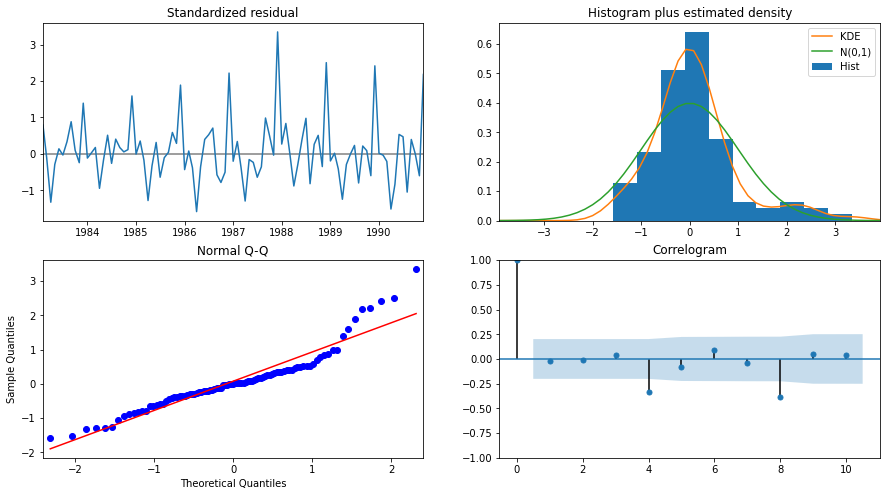

In [98]:
auto_SARIMA1.plot_diagnostics()
plt.show()

In [99]:
auto_SARIMA1_predict=auto_SARIMA1.forecast(steps=(len(test1)))

In [100]:
SARIMA_RMSE=np.round(metrics.mean_squared_error(test1['Sparkling'],auto_SARIMA1_predict,squared=False),2)
SARIMA_RMSE

1190.09

In [101]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [SARIMA_RMSE]}
                           ,index=['Auto SARIMA model(order=(3,1,3),seasonal_order=(3,0,0,11))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804
"AUTO ARIMA model(order=(2,1,2))",1299.980000
"Auto SARIMA model(order=(3,1,3),seasonal_order=(3,0,0,11))",1190.090000


# Question 7

1) Manual ARIMA model

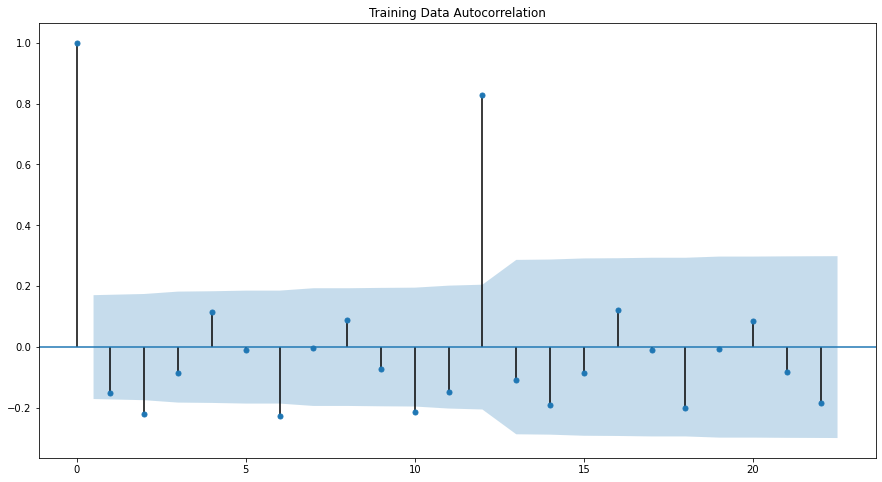

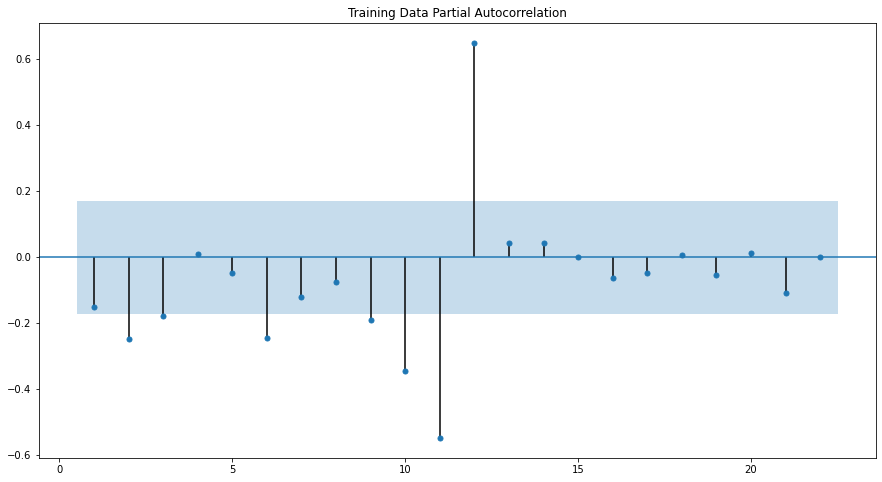

In [102]:
plot_acf(train1.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train1.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [103]:
manual_ARIMA1 = ARIMA(train1['Sparkling'], order=(0,1,0))

manual_ARIMA1 = manual_ARIMA1.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


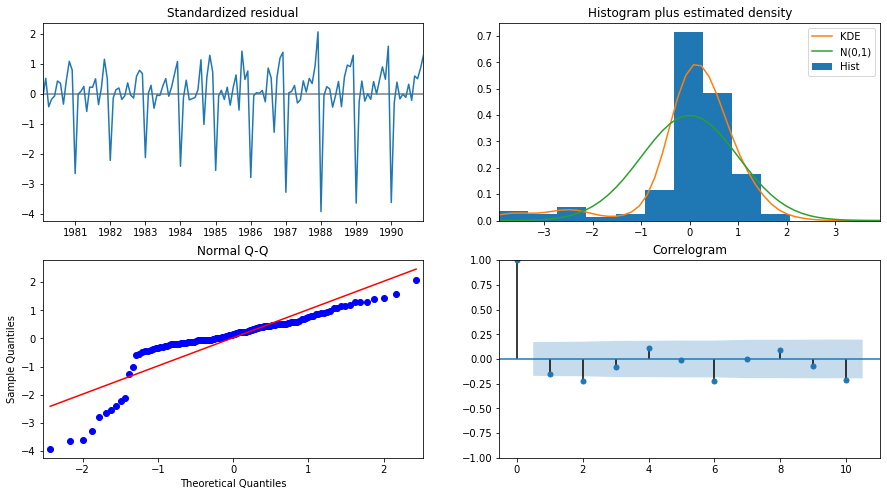

In [104]:
manual_ARIMA1.plot_diagnostics();

In [105]:
manual_ARIMA1_predict = manual_ARIMA1.forecast(steps=len(test1))

In [106]:
manual_ARIMA1_RMSE=np.round(metrics.mean_squared_error(test1['Sparkling'],manual_ARIMA1_predict,squared=False),2)
manual_ARIMA1_RMSE

3864.28

In [107]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [manual_ARIMA1_RMSE]}
                           ,index=['Manual ARIMA model(order=(0,1,0))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804
"AUTO ARIMA model(order=(2,1,2))",1299.980000
"Auto SARIMA model(order=(3,1,3),seasonal_order=(3,0,0,11))",1190.090000
"Manual ARIMA model(order=(0,1,0))",3864.280000


2) Manual SARIMA Model

In [108]:
manual_SARIMA1 = sm.tsa.statespace.SARIMAX(train1['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(0,0,11,22),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
manual_SARIMA1=manual_SARIMA1.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [109]:
manual_SARIMA1_predict = manual_SARIMA1.forecast(steps=len(test1))

In [110]:
manual_SARIMA1_RMSE=np.round(metrics.mean_squared_error(test1['Sparkling'],manual_SARIMA1_predict,squared=False),2)
manual_SARIMA1_RMSE

3083.67

In [111]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [manual_SARIMA1_RMSE]}
                           ,index=['Manual sARIMA model(order=(3,1,3),seasonal_order=(0,0,11,22))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804
"AUTO ARIMA model(order=(2,1,2))",1299.980000
"Auto SARIMA model(order=(3,1,3),seasonal_order=(3,0,0,11))",1190.090000
"Manual ARIMA model(order=(0,1,0))",3864.280000


# Question 8

In [112]:
DF1=resultsDf
DF1

,Test RMSE
"Alpha=0,SES",1275.080000
"Alpha=0.64,Beta=0:DES",3851.000000
"Alpha=0.086,Beta=2.53e-10,Gamma=0.47:TES",362.720000
"Alpha=0.154,Beta=2.68e-31,Gamma=0.37:TES",383.000000
Linear Regression model,1389.000000
Naive model,3864.000000
Simple average model,1275.081804
"AUTO ARIMA model(order=(2,1,2))",1299.980000
"Auto SARIMA model(order=(3,1,3),seasonal_order=(3,0,0,11))",1190.090000
"Manual ARIMA model(order=(0,1,0))",3864.280000


# Question 9

In [219]:
full_data_model = sm.tsa.statespace.SARIMAX(spark_wine['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 0,11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=50)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [220]:
predicted_auto_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [221]:
pred_full_auto_SARIMA_date = predicted_auto_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_auto_SARIMA_date

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,2480.209187,1284.002784,-36.390026,4996.808401
1995-09-01,2520.060771,1298.895698,-25.728017,5065.849559
1995-10-01,2030.446888,1317.188466,-551.195065,4612.088842
1995-11-01,3711.571893,1317.158844,1129.987997,6293.155790
1995-12-01,2568.991184,1320.028727,-18.217580,5156.199947
1996-01-01,1930.918664,1326.656176,-669.279660,4531.116988
1996-02-01,2412.938121,1326.613178,-187.175928,5013.052171
1996-03-01,2840.326128,1329.406922,234.736441,5445.915815
1996-04-01,2092.727728,1333.909762,-521.687364,4707.142821
1996-05-01,2169.646160,1333.959311,-444.866048,4784.158367


In [224]:
Full_data_rmse =np.round (metrics.mean_squared_error(spark_wine['Sparkling'],results_full_data_model.fittedvalues,squared=False),2)
Full_data_rmse

1204.42

# 2) Rose wine

# Question 1

In [113]:
#Reading the data set
rose_wine=pd.read_csv('C:/Users/nicky/Downloads/Rose.csv')

In [114]:
#Checking data types
rose_wine.dtypes

YearMonth     object
Rose         float64
dtype: object

In [115]:
#Providing inputs to tell pandas that we are working with time series
rose_wine=pd.read_csv('C:/Users/nicky/Downloads/Rose.csv',parse_dates=['YearMonth'])

In [116]:
rose_wine.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [117]:
#Making time series reference as index
rose_wine=pd.read_csv('C:/Users/nicky/Downloads/Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [118]:
# Checking head of dataset
rose_wine.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [119]:
#Checking bottom of data set
rose_wine.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [120]:
#Checking for null values
rose_wine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [121]:
# Replacing null values with forward fill
rose_wine=rose_wine.ffill()

In [122]:
rose_wine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


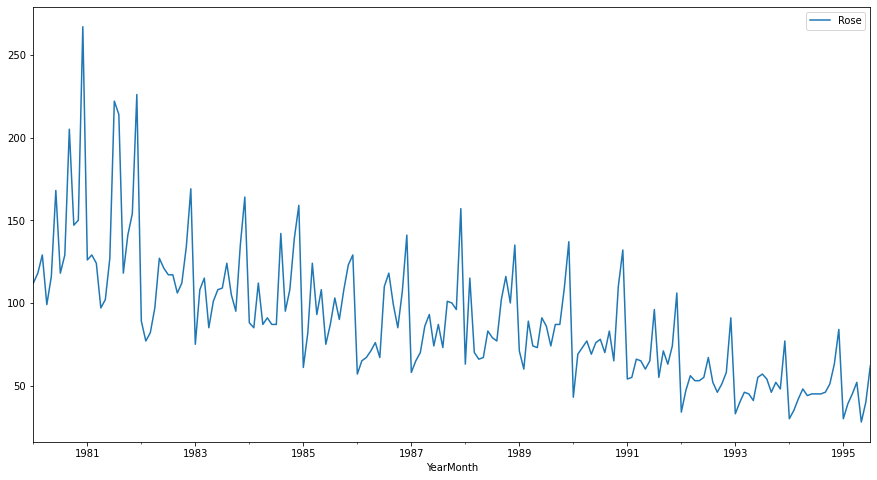

In [123]:
rose_wine.plot()

# Question 2

In [124]:
#Decompsing time series with additive method
rose_wine_add_decompose=seasonal_decompose(rose_wine,model='additive')

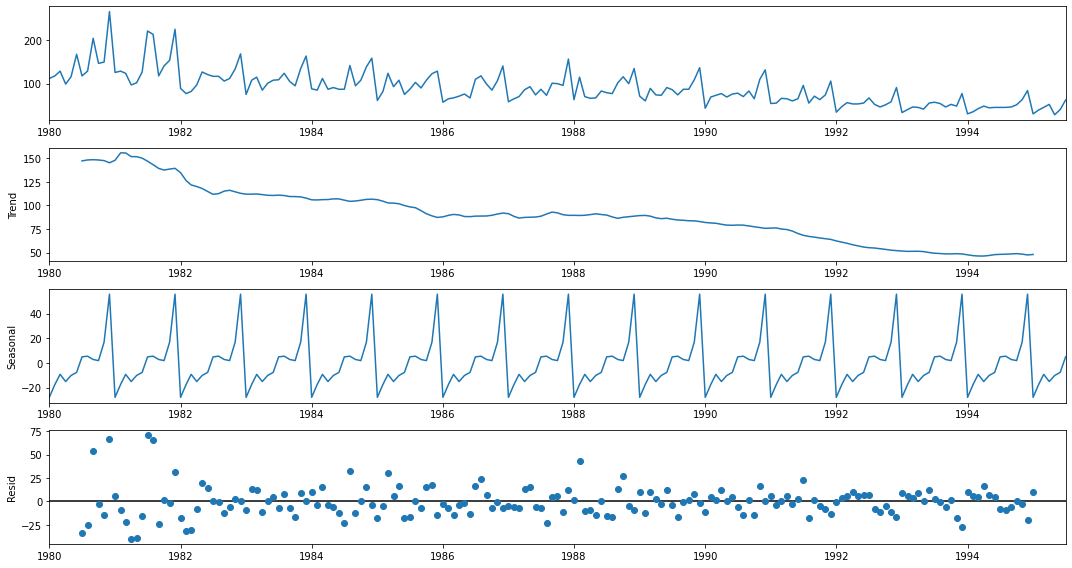

In [125]:
rose_wine_add_decompose.plot()
plt.show()

In [126]:
#Decompsing time series with multiplicative method
rose_wine_multi_decompose=seasonal_decompose(rose_wine,model='multiplicative')

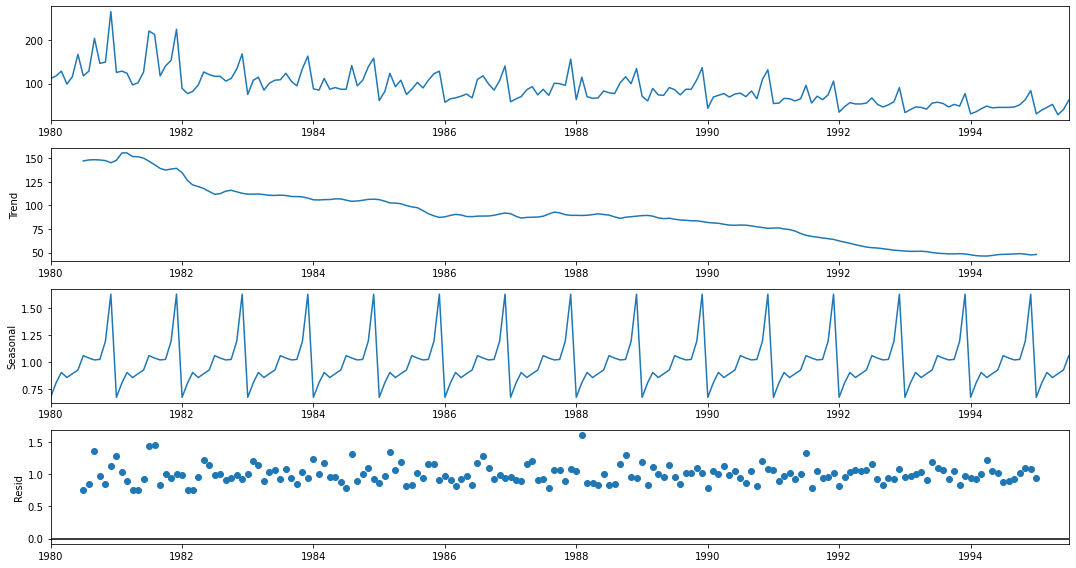

In [127]:
rose_wine_multi_decompose.plot()
plt.show()

# Question 3

In [128]:
# Splitting data into train and test set
train2=rose_wine['1980-01-01':'1990-12-01']
test2=rose_wine['1991-01-01':]

In [129]:
# Checking shape
print(train2.shape)
print(test2.shape)

(132, 1)
(55, 1)


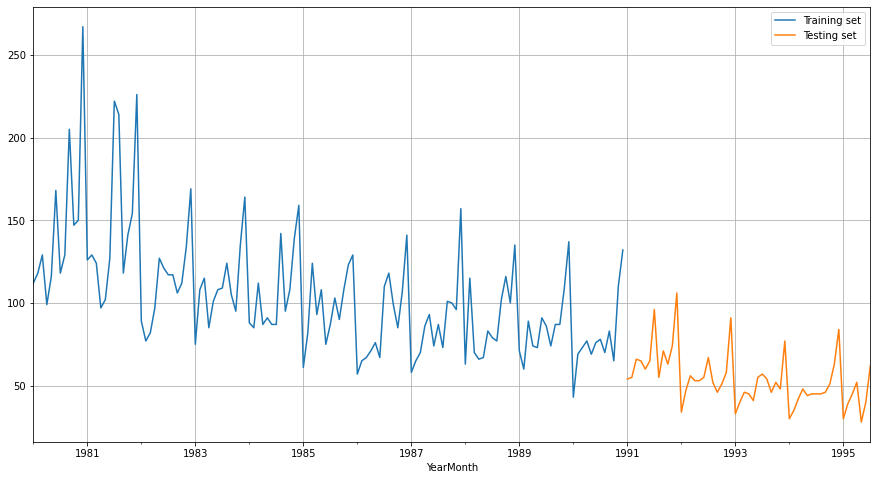

In [130]:
# Training train and test set
train2['Rose'].plot()
test2['Rose'].plot()
plt.grid()
plt.legend(['Training set','Testing set'])
plt.show()

# Question 4

1) Simple exponential smoothening

In [131]:
#Initializing simple exponential smoothing model
SES_model=SimpleExpSmoothing(train2)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
# Fitting training set into the model
SES_model=SES_model.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [133]:
# Checking for parameters
SES_model.params

{'smoothing_level': 0.09874985002628338,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38726392126804,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [134]:
SES_model_predict=SES_model.forecast(len(test2))
SES_model_predict

1991-01-01    87.104998
1991-02-01    87.104998
1991-03-01    87.104998
1991-04-01    87.104998
1991-05-01    87.104998
1991-06-01    87.104998
1991-07-01    87.104998
1991-08-01    87.104998
1991-09-01    87.104998
1991-10-01    87.104998
1991-11-01    87.104998
1991-12-01    87.104998
1992-01-01    87.104998
1992-02-01    87.104998
1992-03-01    87.104998
1992-04-01    87.104998
1992-05-01    87.104998
1992-06-01    87.104998
1992-07-01    87.104998
1992-08-01    87.104998
1992-09-01    87.104998
1992-10-01    87.104998
1992-11-01    87.104998
1992-12-01    87.104998
1993-01-01    87.104998
1993-02-01    87.104998
1993-03-01    87.104998
1993-04-01    87.104998
1993-05-01    87.104998
1993-06-01    87.104998
1993-07-01    87.104998
1993-08-01    87.104998
1993-09-01    87.104998
1993-10-01    87.104998
1993-11-01    87.104998
1993-12-01    87.104998
1994-01-01    87.104998
1994-02-01    87.104998
1994-03-01    87.104998
1994-04-01    87.104998
1994-05-01    87.104998
1994-06-01    87

Text(0.5, 1.0, 'SES Prediction')

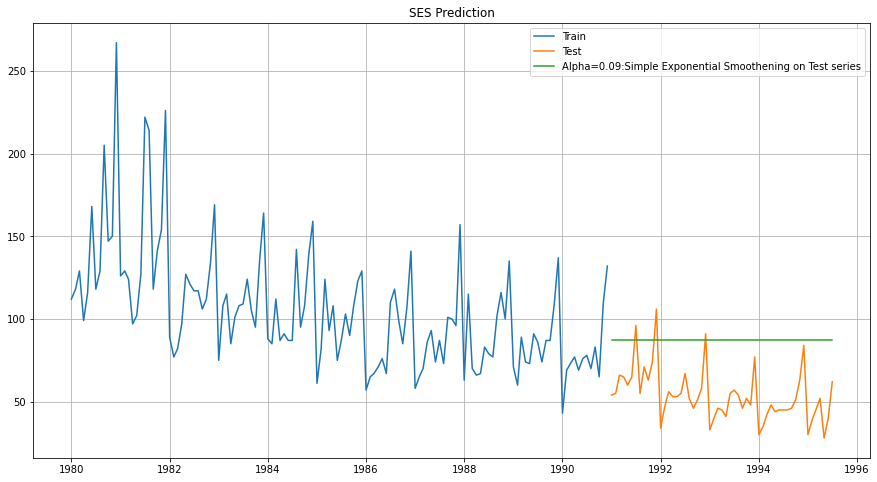

In [135]:
plt.plot(train2,label='Train')
plt.plot(test2,label='Test')
plt.plot(SES_model_predict,label='Alpha=0.09:Simple Exponential Smoothening on Test series')
plt.legend(loc='best')
plt.grid()
plt.title('SES Prediction')

In [136]:
SES_RMSE=np.round(metrics.mean_squared_error(test2.values,SES_model_predict.values,squared=False))
SES_RMSE

37.0

In [137]:
resultsDf = pd.DataFrame({'Test RMSE': [SES_RMSE]},index=['SES: Alpha=0.09'])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.0


2)Double Exponential Smoothing

In [138]:
# Initializing double exponential smoothing model
DES_model=Holt(train2)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [139]:
# Fitting training set into the model
DES_model=DES_model.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [140]:
# Checking for parameters
DES_model.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [141]:
# Forecasting the model on test set
DES_model_predict=DES_model.forecast(len(test2))
DES_model_predict

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


Text(0.5, 1.0, ' DES Prediction')

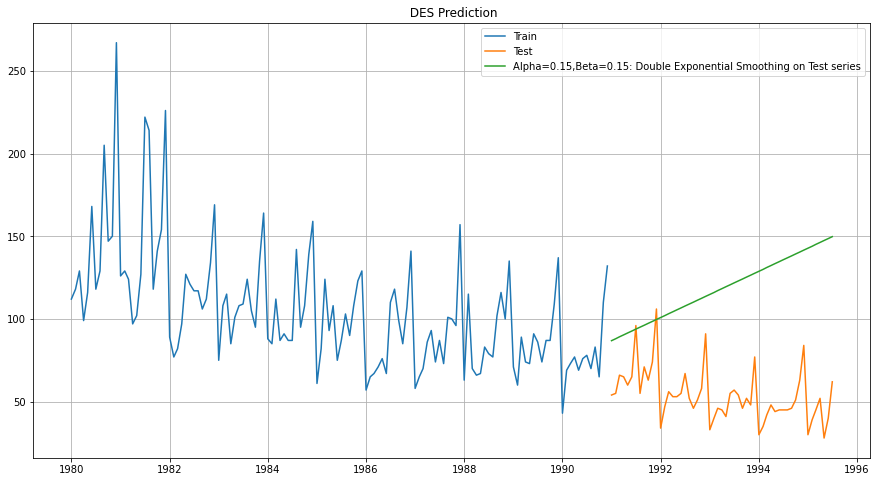

In [142]:
plt.plot(train2,label='Train')
plt.plot(test2,label='Test')
plt.plot(DES_model_predict,label='Alpha=0.15,Beta=0.15: Double Exponential Smoothing on Test series')
plt.legend(loc='best')
plt.grid()
plt.title(' DES Prediction')

In [143]:
DES_RMSE= np.round(metrics.mean_squared_error(test2.values,DES_model_predict.values,squared=False),2)
DES_RMSE

70.6

In [144]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [DES_RMSE]}
                           ,index=['DES: Alpha=0.15, Beta=0,15'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.0
"DES: Alpha=0.15, Beta=0,15",70.6


3) Triple exponential smoothing with additive seasonality

In [145]:
#Initializing the triple exponential smoothing model with additive seasonality
TES_model1=ExponentialSmoothing(train2,trend='additive',seasonal='additive')

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [146]:
# Fitting the model on training set
TES_model1=TES_model1.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [147]:
# Checking for parameters
TES_model1.params

{'smoothing_level': 0.13347307811128115,
 'smoothing_slope': 0.013794460794462322,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 77.91993489048245,
 'initial_slope': 0.0,
 'initial_seasons': array([ 37.17816974,  49.51586963,  57.48442319,  46.82735366,
         55.61555356,  61.04801959,  70.9345658 ,  76.98792802,
         72.97133028,  71.04317894,  89.1094477 , 131.35896726]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [148]:
#Forcasting the model on the test set
TES_model1_predict=TES_model1.forecast(len(test2))
TES_model1_predict

1991-01-01     44.127569
1991-02-01     56.069774
1991-03-01     63.642832
1991-04-01     52.590267
1991-05-01     60.982971
1991-06-01     66.019942
1991-07-01     75.510993
1991-08-01     81.168860
1991-09-01     76.756767
1991-10-01     74.433120
1991-11-01     92.103894
1991-12-01    133.957918
1992-01-01     39.381625
1992-02-01     51.323830
1992-03-01     58.896888
1992-04-01     47.844323
1992-05-01     56.237027
1992-06-01     61.273998
1992-07-01     70.765049
1992-08-01     76.422916
1992-09-01     72.010823
1992-10-01     69.687176
1992-11-01     87.357950
1992-12-01    129.211974
1993-01-01     34.635681
1993-02-01     46.577886
1993-03-01     54.150944
1993-04-01     43.098379
1993-05-01     51.491083
1993-06-01     56.528054
1993-07-01     66.019105
1993-08-01     71.676972
1993-09-01     67.264879
1993-10-01     64.941232
1993-11-01     82.612006
1993-12-01    124.466030
1994-01-01     29.889737
1994-02-01     41.831942
1994-03-01     49.405000
1994-04-01     38.352435


Text(0.5, 1.0, 'TES Prediction with Additive seasonality')

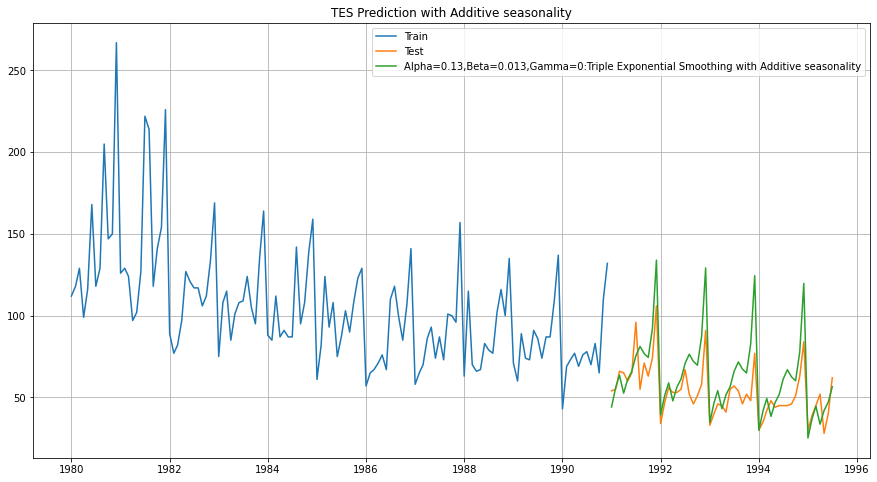

In [149]:
# Plottinf trainset, testingset and forcasted values
plt.plot(train2,label='Train')
plt.plot(test2,label='Test')
plt.plot(TES_model1_predict,label='Alpha=0.13,Beta=0.013,Gamma=0:Triple Exponential Smoothing with Additive seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('TES Prediction with Additive seasonality')

In [150]:
TES_RMSE1 :np.round(metrics.mean_squared_error(test2.values,TES_model1_predict.values,squared=False))
TES_RMSE1

362.72

In [151]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE1]}
                           ,index=['TES: Alpha=0.13, Beta=0.013, Gamma=0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.00
"DES: Alpha=0.15, Beta=0,15",70.60
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.72


4) Triple Exponential Smoothing wit multiplicative seasonality

In [152]:
# Initializing TES model with multiplicative seasonality
TES_model2=ExponentialSmoothing(train2,trend='additive',seasonal='multiplicative')

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [153]:
# Ftting model on to training set
TES_model2=TES_model2.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [154]:
#Checking model paramters
TES_model2.params

{'smoothing_level': 0.10609630896598816,
 'smoothing_slope': 0.048438506611339596,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565108239777,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550257, 1.65927135, 1.80572621, 1.58888812, 1.77822689,
        1.92604353, 2.11649443, 2.25135182, 2.11690561, 2.08112817,
        2.4092726 , 3.30448096]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [155]:
# Forcasting model on to test data
TES_model2_predict=TES_model2.forecast(len(test2))
TES_model2_predict

1991-01-01     56.674339
1991-02-01     63.471277
1991-03-01     68.788790
1991-04-01     60.277828
1991-05-01     67.180379
1991-06-01     72.461082
1991-07-01     79.292416
1991-08-01     83.989694
1991-09-01     78.640176
1991-10-01     76.982912
1991-11-01     88.741360
1991-12-01    121.193706
1992-01-01     53.882213
1992-02-01     60.331401
1992-03-01     65.371775
1992-04-01     57.271140
1992-05-01     63.815402
1992-06-01     68.816387
1992-07-01     75.287327
1992-08-01     79.729412
1992-09-01     74.634309
1992-10-01     73.044747
1992-11-01     84.182241
1992-12-01    114.940564
1993-01-01     51.090087
1993-02-01     57.191526
1993-03-01     61.954760
1993-04-01     54.264452
1993-05-01     60.450424
1993-06-01     65.171693
1993-07-01     71.282238
1993-08-01     75.469129
1993-09-01     70.628442
1993-10-01     69.106583
1993-11-01     79.623121
1993-12-01    108.687422
1994-01-01     48.297961
1994-02-01     54.051650
1994-03-01     58.537744
1994-04-01     51.257765


Text(0.5, 1.0, 'TES Prediction')

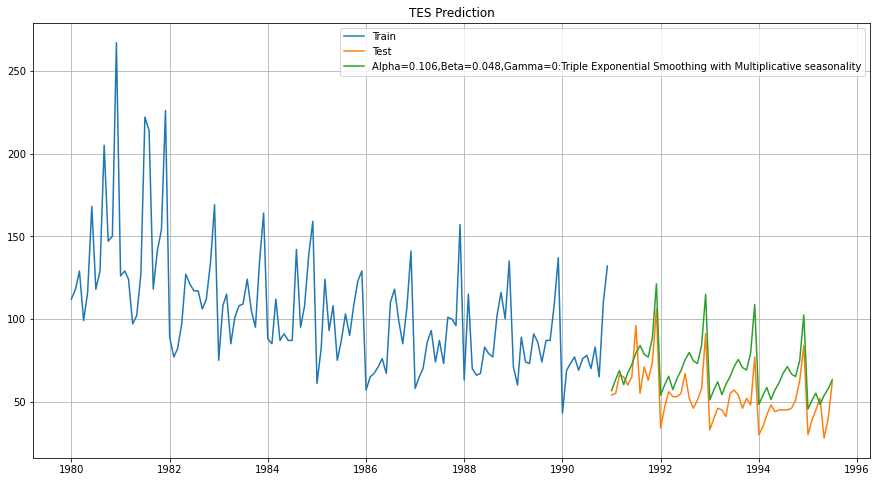

In [156]:
# Plotting training set,test set and forcasted values
plt.plot(train2,label='Train')
plt.plot(test2,label='Test')
plt.plot(TES_model2_predict,label='Alpha=0.106,Beta=0.048,Gamma=0:Triple Exponential Smoothing with Multiplicative seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('TES Prediction')

In [157]:
TES_RMSE2=np.round(metrics.mean_squared_error(test2.values,TES_model2_predict.values,squared=False))
TES_RMSE2

17.0

In [158]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE2]}
                           ,index=['TES: Alpha=0.106, Beta=0.048, Gamma=0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.00
"DES: Alpha=0.15, Beta=0,15",70.60
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.72
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.00


5) Linear Regression model

In [159]:
print(rose_wine.shape)
print(train2.shape)
print(test2.shape)

(187, 1)
(132, 1)
(55, 1)


In [160]:
# Modifying training and test set bfore fitting it into regression model
train2_time=[i+1 for i in range(len(train2))]
test2_time=[i+133 for i in range(len(test2))]
print('Training time instance','\n',train2_time)
print('Testing time instance','\n',test2_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Testing time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [161]:
LinearRegression_train2=train2.copy()
LinearRegression_test2=test2.copy()

In [162]:
LinearRegression_train2['Time']=train2_time
LinearRegression_test2['Time']=test2_time

In [163]:
# Initializing linear regression model
rose_lr=LinearRegression()

In [164]:
# Fitting test data into linear regression model
rose_lr.fit(LinearRegression_train2[['Time']],LinearRegression_train2['Rose'])

LinearRegression()

Text(0.5, 1.0, 'Linear Regression model')

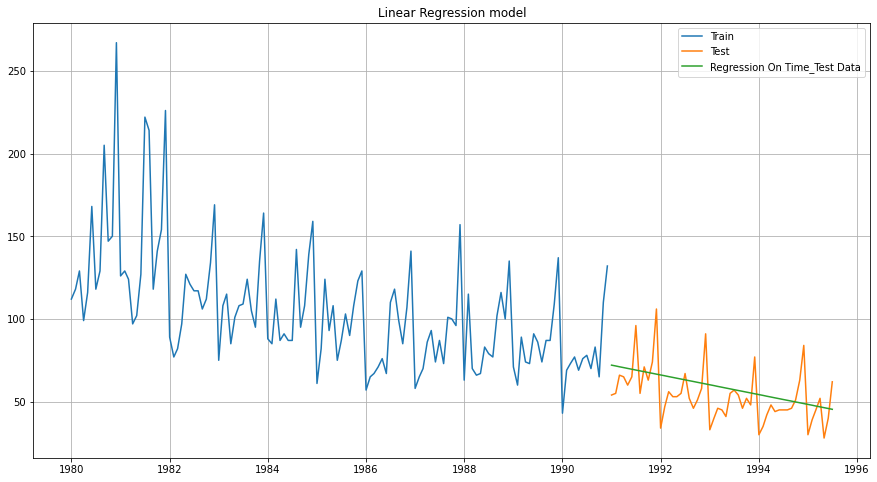

In [165]:
# Forecasting model on to test dat
rose_lr_train_predict= rose_lr.predict(LinearRegression_train2[['Time']])
LinearRegression_train2['Regontime']=rose_lr_train_predict
rose_lr_test_predict=rose_lr.predict(LinearRegression_test2[['Time']])
LinearRegression_test2['Regontime']=rose_lr_test_predict


# Plotting train set, test set and forcasted values of linear regression model 
plt.plot( train2['Rose'], label='Train')
plt.plot(test2['Rose'], label='Test')
plt.plot(LinearRegression_test2['Regontime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid()
plt.title('Linear Regression model')



In [166]:
# RMSE Score
LR_RMSE=np.round(mean_squared_error(test2['Rose'],rose_lr_test_predict,squared=False))
LR_RMSE

15.0

In [167]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [LR_RMSE]}
                           ,index=['Linear Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.00
"DES: Alpha=0.15, Beta=0,15",70.60
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.72
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.00
Linear Regression,15.00


6) Naive forecast model

In [168]:
# Making a copy of train and test set
NaiveModel_train=train2.copy()
NaiveModel_test=test2.copy()

In [169]:
train2.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [170]:
NaiveModel_test['Naive']=132
NaiveModel_test.head()

,Rose,Naive
YearMonth,,
1991-01-01,54.0,132
1991-02-01,55.0,132
1991-03-01,66.0,132
1991-04-01,65.0,132
1991-05-01,60.0,132


Text(0.5, 1.0, 'Naive Forecast')

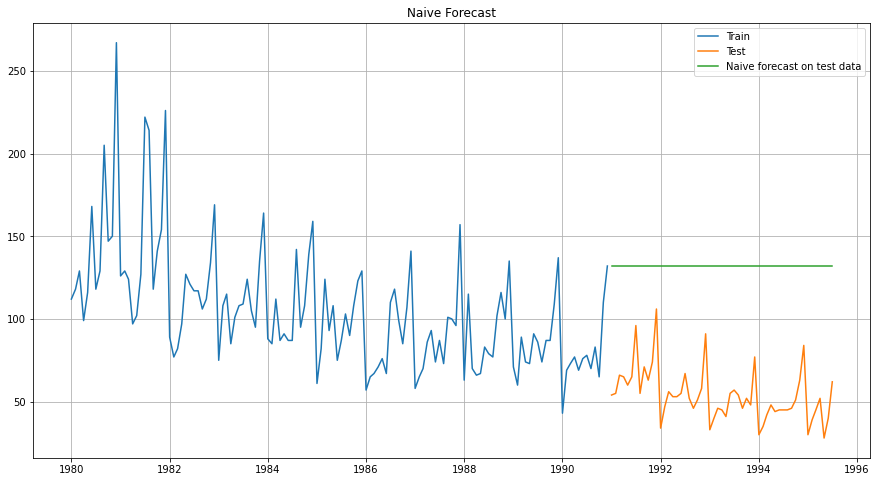

In [171]:
# Plotting train set, test set and forecasted values
plt.plot(NaiveModel_train['Rose'],label='Train')
plt.plot(NaiveModel_test['Rose'],label='Test')
plt.plot(NaiveModel_test['Naive'],label='Naive forecast on test data')
plt.legend(loc='best')
plt.grid()
plt.title('Naive Forecast')

In [172]:
# RMSE 
NAIVE_RMSE=np.round(metrics.mean_squared_error(test2['Rose'],NaiveModel_test['Naive'],squared=False))
NAIVE_RMSE

80.0

In [173]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [NAIVE_RMSE]}
                           ,index=['Naive modle'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.00
"DES: Alpha=0.15, Beta=0,15",70.60
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.72
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.00
Linear Regression,15.00
Naive modle,80.00


7) Simple mean average model

In [174]:
# Making copy of train set and test set
SimpleAverage_train=train2.copy()
SimpleAverage_test=test2.copy()

In [175]:
# Taking average mean for forecast
SimpleAverage_test['mean forecast']=train2['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


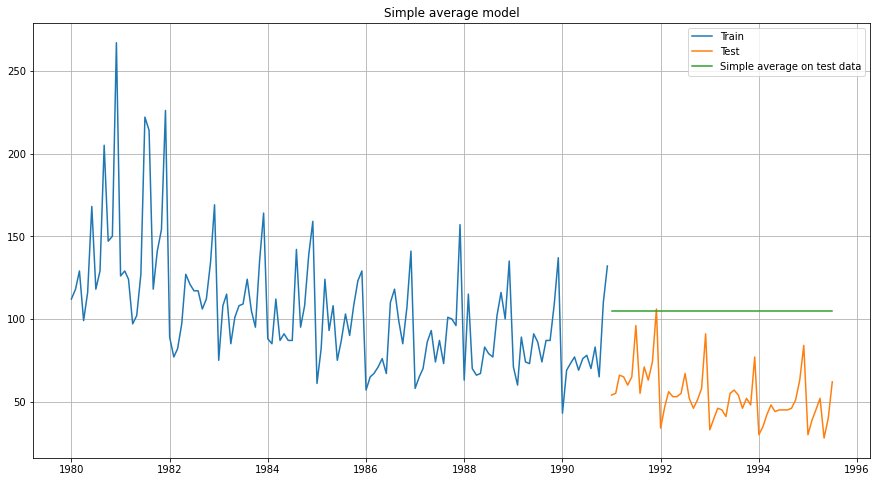

In [176]:
# Plotting train set, test set and forecast done by average mean model on test set
plt.plot(SimpleAverage_train['Rose'],label='Train')
plt.plot(SimpleAverage_test['Rose'],label='Test')
plt.plot(SimpleAverage_test['mean forecast'],label='Simple average on test data')
plt.legend(loc='best')
plt.grid()
plt.title('Simple average model')
plt.show()

In [177]:
# RMSE
SIMPLEAVERAGE_RMSE=metrics.mean_squared_error(test2['Rose'],SimpleAverage_test['mean forecast'],squared=False)
SIMPLEAVERAGE_RMSE

53.48085657692872

In [178]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [SIMPLEAVERAGE_RMSE]}
                           ,index=['Simple average model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857


# Question 5

i) Stationarity of original dataset

In [179]:
# Checking for stationarity of complete dataset by p value
rose_winetest=adfuller(rose_wine,regression='ct')
print('P Value : ',rose_winetest[1])

P Value :  0.4669420602610178


In [180]:
# Taking 1 level of differencing to check if data becomes stationary
rose_winetest=adfuller(rose_wine.diff().dropna(),regression='ct')
print('P Value : ',rose_winetest[1])

P Value :  3.028272263688664e-11


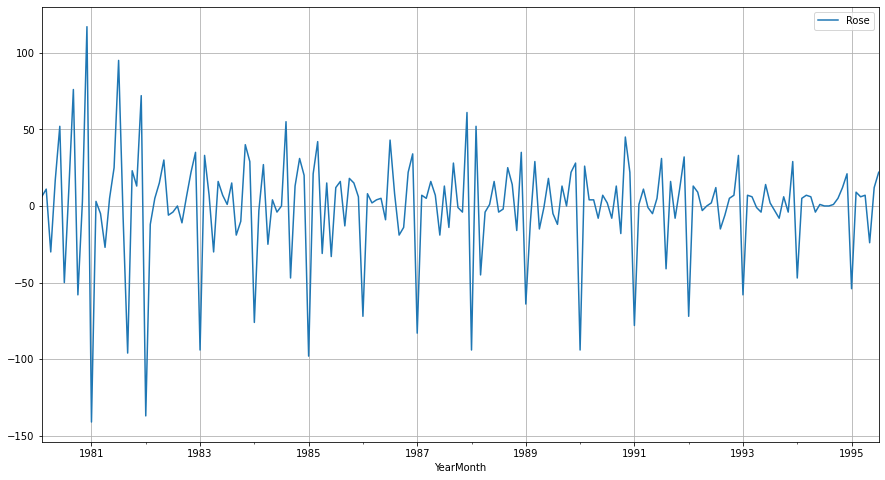

In [181]:
# Plotting stationary series
rose_wine.diff().dropna().plot(grid=True)

ii) Stationarity of train data

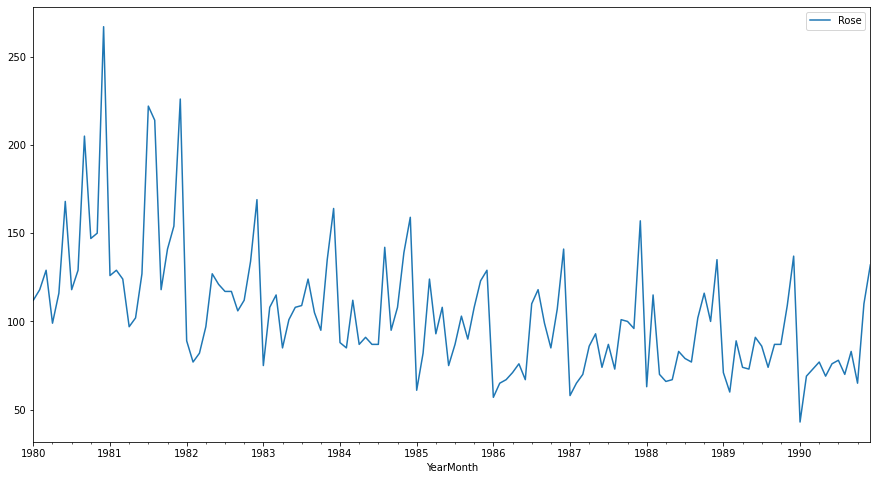

In [182]:
#Plotting tain data
train2.plot()

In [183]:
# Checking if train data is stationary
train2test=adfuller(train2,regression='ct')
print('P Value : ',train2test[1])

P Value :  0.7569093051047028


In [184]:
# Taking 1 level of differencing to check if train set becomes stationary
train2test=adfuller(train2.diff().dropna(),regression='ct')
print('P Value : ',train2test[1])

P Value :  3.894831356782456e-08


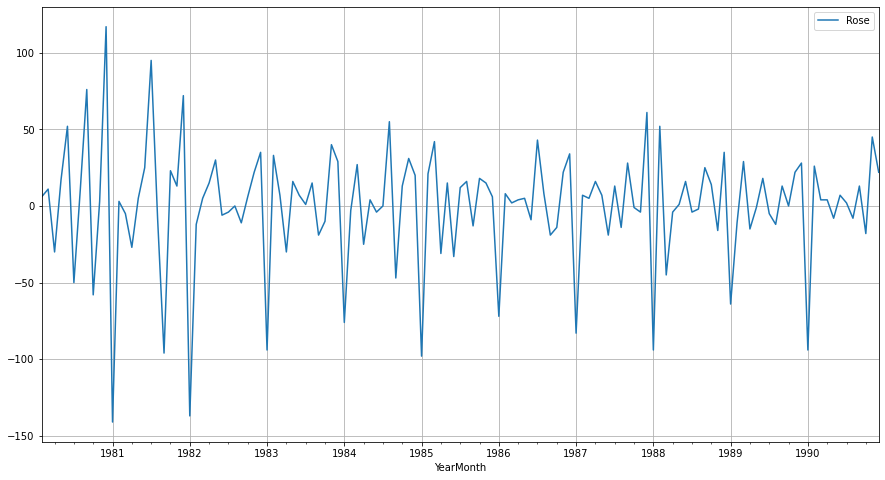

In [185]:
# Plotting stationary train set
train2.diff().dropna().plot(grid=True)

ii) Stationarity of test data

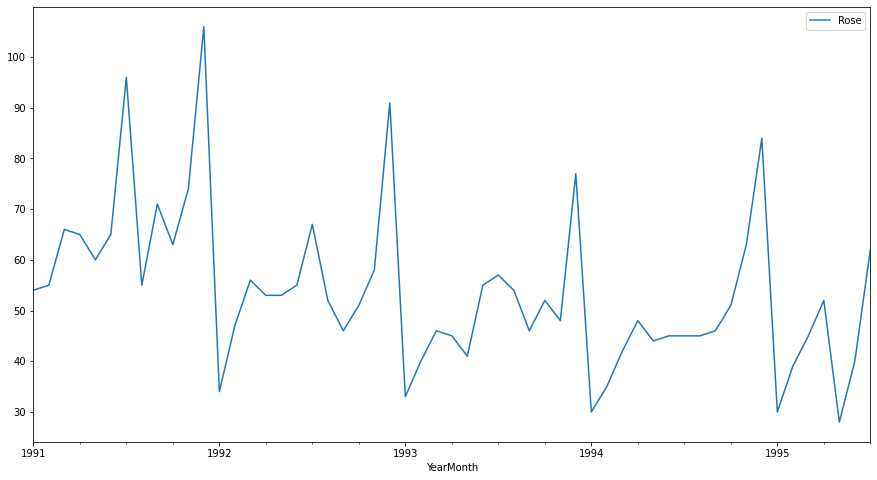

In [186]:
#Plotting tain data
test2.plot()

In [187]:
# Checking if train data is stationary
test2test=adfuller(test2,regression='ct')
print('P Value : ',test2test[1])

P Value :  0.9377925384214822


In [188]:
# Taking 1 level of differencing to check if train set becomes stationary
test2test=adfuller(test2.diff().dropna(),regression='ct')
print('P Value : ',test2test[1])

P Value :  6.575183298005514e-18


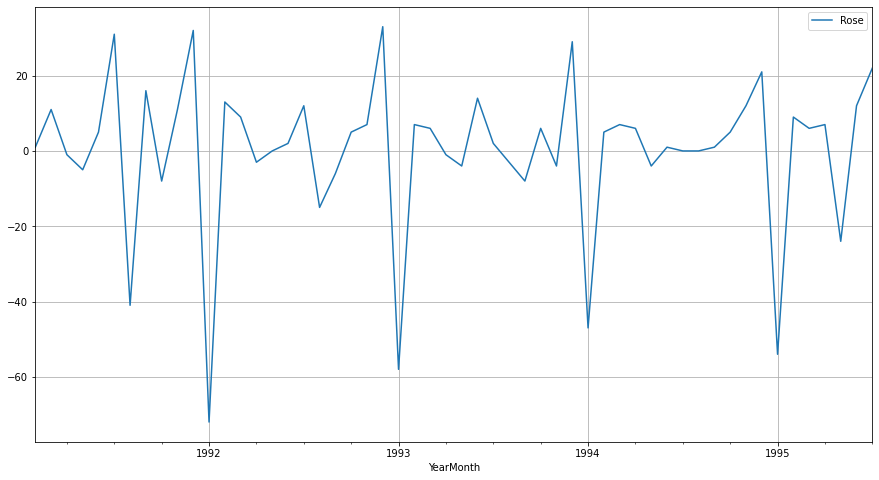

In [189]:
# Plotting stationary train set
test2.diff().dropna().plot(grid=True)

# Question 6

i) Automated ARIMA Model

In [190]:
# Forming a loop  to help us in getting a combination of different parameters of p and q in the range of 0 and 4
##  The value of d is 1 as we need to take a difference of the series to make it stationary.
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
print('parameters combination for the model')
for i in range(0,len(pdq)):
    print('Model : {}'.format(pdq[i]))

parameters combination for the model
Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [191]:
# Creating an empty dataframe with column names only
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])
ARIMA_AIC

,param,AIC


In [192]:

for param in pdq:
    ARIMA_model = ARIMA(train2['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319817257
ARIMA(0, 1, 2) - AIC:1279.6715288726227
ARIMA(0, 1, 3) - AIC:1280.5453761819563
ARIMA(1, 1, 0) - AIC:1317.3503105381612
ARIMA(1, 1, 1) - AIC:1280.574229534538
ARIMA(1, 1, 2) - AIC:1279.8707234399978
ARIMA(1, 1, 3) - AIC:1281.8707224743498
ARIMA(2, 1, 0) - AIC:1298.611034160497
ARIMA(2, 1, 1) - AIC:1281.5078621337404
ARIMA(2, 1, 2) - AIC:1281.8707221653049


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 3) - AIC:1274.6952247581485
ARIMA(3, 1, 0) - AIC:1297.4810917271652
ARIMA(3, 1, 1) - AIC:1282.419277541867


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.7207406609787
ARIMA(3, 1, 3) - AIC:1278.6634634096156


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [193]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695225
15,"(3, 1, 3)",1278.663463
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [194]:
auto_ARIMA2=ARIMA(train2,order=(2,1,3))
auto_ARIMA2=auto_ARIMA2.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


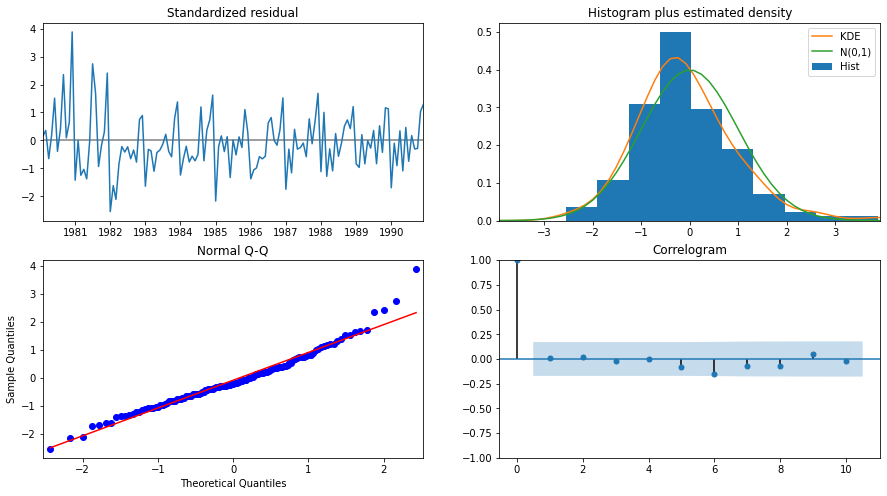

In [195]:
auto_ARIMA2.plot_diagnostics()
plt.plot();

In [196]:
auto_ARIMA2_predict=auto_ARIMA2.forecast(steps=(len(test2)))

In [197]:
auto_ARIMA_RMSE=np.round(metrics.mean_squared_error(test2['Rose'],auto_ARIMA2_predict,squared=False),2)
auto_ARIMA_RMSE

36.84

In [198]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [auto_ARIMA_RMSE]}
                           ,index=['Auto ARIMA model(order(2,1,3))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857
"Auto ARIMA model(order(2,1,3))",36.840000


ii)Auto sarima model

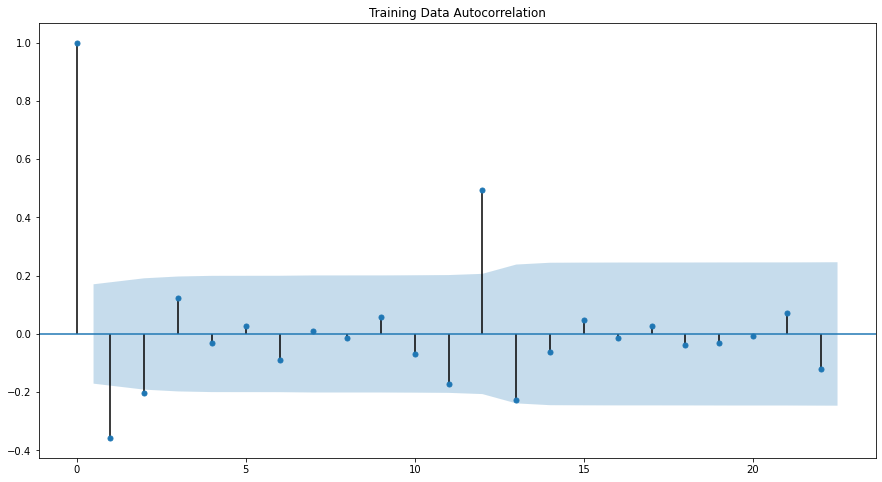

In [199]:
plot_acf(train2.diff(),title='Training Data Autocorrelation',missing='drop')
plt.show()

In [200]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, D, q))]
print(' parameter combinations for the Model ')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

 parameter combinations for the Model 
Model: (0, 1, 1)(0, 0, 1, 11)
Model: (0, 1, 2)(0, 0, 2, 11)
Model: (0, 1, 3)(0, 0, 3, 11)
Model: (1, 1, 0)(1, 0, 0, 11)
Model: (1, 1, 1)(1, 0, 1, 11)
Model: (1, 1, 2)(1, 0, 2, 11)
Model: (1, 1, 3)(1, 0, 3, 11)
Model: (2, 1, 0)(2, 0, 0, 11)
Model: (2, 1, 1)(2, 0, 1, 11)
Model: (2, 1, 2)(2, 0, 2, 11)
Model: (2, 1, 3)(2, 0, 3, 11)
Model: (3, 1, 0)(3, 0, 0, 11)
Model: (3, 1, 1)(3, 0, 1, 11)
Model: (3, 1, 2)(3, 0, 2, 11)
Model: (3, 1, 3)(3, 0, 3, 11)


In [201]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [202]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=50)    
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 11) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 11) - AIC:1177.7797393697647
SARIMA(0, 1, 0)x(0, 0, 2, 11) - AIC:1059.5807564949666


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 0, 3, 11) - AIC:4472.973603772176
SARIMA(0, 1, 0)x(1, 0, 0, 11) - AIC:1210.2674642593374
SARIMA(0, 1, 0)x(1, 0, 1, 11) - AIC:1175.8588993621722
SARIMA(0, 1, 0)x(1, 0, 2, 11) - AIC:1061.3755661184327


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 0, 3, 11) - AIC:2302.0449189985234
SARIMA(0, 1, 0)x(2, 0, 0, 11) - AIC:1072.687121572789
SARIMA(0, 1, 0)x(2, 0, 1, 11) - AIC:1074.2423815194127
SARIMA(0, 1, 0)x(2, 0, 2, 11) - AIC:1062.8052923665837


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 0, 3, 11) - AIC:4255.384923756959
SARIMA(0, 1, 0)x(3, 0, 0, 11) - AIC:953.9949973243805
SARIMA(0, 1, 0)x(3, 0, 1, 11) - AIC:954.9120279892821
SARIMA(0, 1, 0)x(3, 0, 2, 11) - AIC:956.8337303364191


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 3, 11) - AIC:2554.5708936181045
SARIMA(0, 1, 1)x(0, 0, 0, 11) - AIC:1263.536909726377
SARIMA(0, 1, 1)x(0, 0, 1, 11) - AIC:1139.5042328296122
SARIMA(0, 1, 1)x(0, 0, 2, 11) - AIC:1003.697250128026


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 0, 3, 11) - AIC:978.4840034995905
SARIMA(0, 1, 1)x(1, 0, 0, 11) - AIC:1169.7442547518508
SARIMA(0, 1, 1)x(1, 0, 1, 11) - AIC:1137.091926670098
SARIMA(0, 1, 1)x(1, 0, 2, 11) - AIC:1005.3046518132901


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 0, 3, 11) - AIC:1225.6279833073193
SARIMA(0, 1, 1)x(2, 0, 0, 11) - AIC:1037.2506181261342
SARIMA(0, 1, 1)x(2, 0, 1, 11) - AIC:1038.0285874368124
SARIMA(0, 1, 1)x(2, 0, 2, 11) - AIC:1007.297308716166


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 0, 3, 11) - AIC:1623.6648976941078
SARIMA(0, 1, 1)x(3, 0, 0, 11) - AIC:920.7586440480251
SARIMA(0, 1, 1)x(3, 0, 1, 11) - AIC:922.618826297901
SARIMA(0, 1, 1)x(3, 0, 2, 11) - AIC:924.6165004974478


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 0, 3, 11) - AIC:1666.9783303052418
SARIMA(0, 1, 2)x(0, 0, 0, 11) - AIC:1251.6675430829735
SARIMA(0, 1, 2)x(0, 0, 1, 11) - AIC:1127.1582217831217
SARIMA(0, 1, 2)x(0, 0, 2, 11) - AIC:988.8378162559662


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 0, 3, 11) - AIC:2299.2473050860635
SARIMA(0, 1, 2)x(1, 0, 0, 11) - AIC:1165.9748348935207
SARIMA(0, 1, 2)x(1, 0, 1, 11) - AIC:1123.022963443896
SARIMA(0, 1, 2)x(1, 0, 2, 11) - AIC:990.5094085745659


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 0, 3, 11) - AIC:2331.197708914689
SARIMA(0, 1, 2)x(2, 0, 0, 11) - AIC:1038.5887725342554
SARIMA(0, 1, 2)x(2, 0, 1, 11) - AIC:1039.2083707150741
SARIMA(0, 1, 2)x(2, 0, 2, 11) - AIC:992.5093361060028


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 0, 3, 11) - AIC:2013.913969778926
SARIMA(0, 1, 2)x(3, 0, 0, 11) - AIC:922.0201951336181
SARIMA(0, 1, 2)x(3, 0, 1, 11) - AIC:923.8104538772603
SARIMA(0, 1, 2)x(3, 0, 2, 11) - AIC:925.8094831023303


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 0, 3, 11) - AIC:2514.3380442407815
SARIMA(0, 1, 3)x(0, 0, 0, 11) - AIC:1243.9501225605773
SARIMA(0, 1, 3)x(0, 0, 1, 11) - AIC:1119.9424743484328
SARIMA(0, 1, 3)x(0, 0, 2, 11) - AIC:982.624701619835


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(0, 0, 3, 11) - AIC:2985.597444669949
SARIMA(0, 1, 3)x(1, 0, 0, 11) - AIC:1167.658660020494
SARIMA(0, 1, 3)x(1, 0, 1, 11) - AIC:1115.2371729001297
SARIMA(0, 1, 3)x(1, 0, 2, 11) - AIC:984.3347033589857


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 0, 3, 11) - AIC:3719.5298929722007
SARIMA(0, 1, 3)x(2, 0, 0, 11) - AIC:1040.1074551268011
SARIMA(0, 1, 3)x(2, 0, 1, 11) - AIC:1040.908013648856
SARIMA(0, 1, 3)x(2, 0, 2, 11) - AIC:986.331900185712


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 0, 3, 11) - AIC:3435.223485834646
SARIMA(0, 1, 3)x(3, 0, 0, 11) - AIC:924.0137100774353
SARIMA(0, 1, 3)x(3, 0, 1, 11) - AIC:925.8069329985594
SARIMA(0, 1, 3)x(3, 0, 2, 11) - AIC:927.8051571520627


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 0, 3, 11) - AIC:3692.58180208873
SARIMA(1, 1, 0)x(0, 0, 0, 11) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 11) - AIC:1175.803123623496
SARIMA(1, 1, 0)x(0, 0, 2, 11) - AIC:1042.378938413009


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 0, 3, 11) - AIC:2723.239026213476
SARIMA(1, 1, 0)x(1, 0, 0, 11) - AIC:1180.2717981882583
SARIMA(1, 1, 0)x(1, 0, 1, 11) - AIC:1173.7754150004941
SARIMA(1, 1, 0)x(1, 0, 2, 11) - AIC:1043.7690182601855


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 0, 3, 11) - AIC:2671.4972481651307
SARIMA(1, 1, 0)x(2, 0, 0, 11) - AIC:1049.8086612168568
SARIMA(1, 1, 0)x(2, 0, 1, 11) - AIC:1043.2456015790676
SARIMA(1, 1, 0)x(2, 0, 2, 11) - AIC:1043.8462743880223


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 0, 3, 11) - AIC:936.6462095085369
SARIMA(1, 1, 0)x(3, 0, 0, 11) - AIC:932.7189727864024
SARIMA(1, 1, 0)x(3, 0, 1, 11) - AIC:932.2468428058434
SARIMA(1, 1, 0)x(3, 0, 2, 11) - AIC:934.1648876276812


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 0, 3, 11) - AIC:2746.5948679150506
SARIMA(1, 1, 1)x(0, 0, 0, 11) - AIC:1262.1840064428407
SARIMA(1, 1, 1)x(0, 0, 1, 11) - AIC:1137.1598963163847
SARIMA(1, 1, 1)x(0, 0, 2, 11) - AIC:999.6816120002044


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 0, 3, 11) - AIC:2454.3506717708888
SARIMA(1, 1, 1)x(1, 0, 0, 11) - AIC:1149.9837926996354
SARIMA(1, 1, 1)x(1, 0, 1, 11) - AIC:1132.617556556867
SARIMA(1, 1, 1)x(1, 0, 2, 11) - AIC:1001.6776891525561
SARIMA(1, 1, 1)x(1, 0, 3, 11) - AIC:955.7022747022445
SARIMA(1, 1, 1)x(2, 0, 0, 11) - AIC:1023.4219096961674
SARIMA(1, 1, 1)x(2, 0, 1, 11) - AIC:1019.2232630448987
SARIMA(1, 1, 1)x(2, 0, 2, 11) - AIC:1003.6291794712062


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 3, 11) - AIC:2553.6477364363254
SARIMA(1, 1, 1)x(3, 0, 0, 11) - AIC:913.9905261656306
SARIMA(1, 1, 1)x(3, 0, 1, 11) - AIC:915.7838886545865
SARIMA(1, 1, 1)x(3, 0, 2, 11) - AIC:917.4802542603669


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 3, 11) - AIC:3041.950801316495
SARIMA(1, 1, 2)x(0, 0, 0, 11) - AIC:1251.9495040731836
SARIMA(1, 1, 2)x(0, 0, 1, 11) - AIC:1129.0359353548965
SARIMA(1, 1, 2)x(0, 0, 2, 11) - AIC:988.2679545390067


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(0, 0, 3, 11) - AIC:3657.1746387081844
SARIMA(1, 1, 2)x(1, 0, 0, 11) - AIC:1151.0467352440598
SARIMA(1, 1, 2)x(1, 0, 1, 11) - AIC:1125.0041037065166
SARIMA(1, 1, 2)x(1, 0, 2, 11) - AIC:990.2678599755886


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(1, 0, 3, 11) - AIC:2138.2956434103203
SARIMA(1, 1, 2)x(2, 0, 0, 11) - AIC:1021.1386706687657
SARIMA(1, 1, 2)x(2, 0, 1, 11) - AIC:1020.4555290481384
SARIMA(1, 1, 2)x(2, 0, 2, 11) - AIC:992.1706858533352


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 3, 11) - AIC:2676.7660318343956
SARIMA(1, 1, 2)x(3, 0, 0, 11) - AIC:914.1097946622217
SARIMA(1, 1, 2)x(3, 0, 1, 11) - AIC:916.4960462729041
SARIMA(1, 1, 2)x(3, 0, 2, 11) - AIC:918.3368942422751


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 3, 11) - AIC:1955.860444312352
SARIMA(1, 1, 3)x(0, 0, 0, 11) - AIC:1245.546313203217
SARIMA(1, 1, 3)x(0, 0, 1, 11) - AIC:1121.6696787423439
SARIMA(1, 1, 3)x(0, 0, 2, 11) - AIC:984.5755857631906


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(0, 0, 3, 11) - AIC:4240.522749182923
SARIMA(1, 1, 3)x(1, 0, 0, 11) - AIC:1154.2307212829376
SARIMA(1, 1, 3)x(1, 0, 1, 11) - AIC:1117.2225440995328
SARIMA(1, 1, 3)x(1, 0, 2, 11) - AIC:986.1562107275778


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 0, 3, 11) - AIC:4171.253113170535
SARIMA(1, 1, 3)x(2, 0, 0, 11) - AIC:1023.0826128336956
SARIMA(1, 1, 3)x(2, 0, 1, 11) - AIC:1022.3424153975409


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 2, 11) - AIC:988.151578790221


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 3, 11) - AIC:4163.544619959227
SARIMA(1, 1, 3)x(3, 0, 0, 11) - AIC:915.9996258767115


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 1, 11) - AIC:917.2158233783073


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 2, 11) - AIC:918.859016111677


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 3, 11) - AIC:4203.471627328624
SARIMA(2, 1, 0)x(0, 0, 0, 11) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 11) - AIC:1167.9540206925008
SARIMA(2, 1, 0)x(0, 0, 2, 11) - AIC:1039.2207414463837


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 0, 3, 11) - AIC:3839.067133377099
SARIMA(2, 1, 0)x(1, 0, 0, 11) - AIC:1161.1286914709083
SARIMA(2, 1, 0)x(1, 0, 1, 11) - AIC:1163.0633419895735
SARIMA(2, 1, 0)x(1, 0, 2, 11) - AIC:1037.7137708480132


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 0, 3, 11) - AIC:3665.0648280576793
SARIMA(2, 1, 0)x(2, 0, 0, 11) - AIC:1022.8327525658322
SARIMA(2, 1, 0)x(2, 0, 1, 11) - AIC:1020.2071819485968
SARIMA(2, 1, 0)x(2, 0, 2, 11) - AIC:1020.9149094722509


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 0, 3, 11) - AIC:1121.9402389423012
SARIMA(2, 1, 0)x(3, 0, 0, 11) - AIC:917.4312758238576
SARIMA(2, 1, 0)x(3, 0, 1, 11) - AIC:916.4000850852973
SARIMA(2, 1, 0)x(3, 0, 2, 11) - AIC:918.3957887266745


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 0, 3, 11) - AIC:2449.7798440391052
SARIMA(2, 1, 1)x(0, 0, 0, 11) - AIC:1263.231523280825
SARIMA(2, 1, 1)x(0, 0, 1, 11) - AIC:1135.7417483075965
SARIMA(2, 1, 1)x(0, 0, 2, 11) - AIC:1001.6768974032354


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 0, 3, 11) - AIC:4597.5887944445985
SARIMA(2, 1, 1)x(1, 0, 0, 11) - AIC:1137.6203567956004
SARIMA(2, 1, 1)x(1, 0, 1, 11) - AIC:1133.6876341102354
SARIMA(2, 1, 1)x(1, 0, 2, 11) - AIC:1003.6735046744498


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(1, 0, 3, 11) - AIC:4554.864940159045
SARIMA(2, 1, 1)x(2, 0, 0, 11) - AIC:1003.3267907176644
SARIMA(2, 1, 1)x(2, 0, 1, 11) - AIC:1004.616588054949
SARIMA(2, 1, 1)x(2, 0, 2, 11) - AIC:1005.6275621308167


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 3, 11) - AIC:4581.848449389845
SARIMA(2, 1, 1)x(3, 0, 0, 11) - AIC:905.9188265288244
SARIMA(2, 1, 1)x(3, 0, 1, 11) - AIC:906.103743896734
SARIMA(2, 1, 1)x(3, 0, 2, 11) - AIC:907.7326956520895


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 3, 11) - AIC:4577.342813312547
SARIMA(2, 1, 2)x(0, 0, 0, 11) - AIC:1253.910211657204


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 0, 1, 11) - AIC:1126.8961537260298
SARIMA(2, 1, 2)x(0, 0, 2, 11) - AIC:990.2266171886174


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 0, 3, 11) - AIC:1437.5910226092792
SARIMA(2, 1, 2)x(1, 0, 0, 11) - AIC:1139.573634495629


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 1, 11) - AIC:1123.339449336295
SARIMA(2, 1, 2)x(1, 0, 2, 11) - AIC:992.223834329065


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 3, 11) - AIC:2648.895869272569


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 0, 11) - AIC:1002.4626053280551


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 1, 11) - AIC:1010.9500743680252
SARIMA(2, 1, 2)x(2, 0, 2, 11) - AIC:994.1243815701779


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 3, 11) - AIC:3492.797713392497
SARIMA(2, 1, 2)x(3, 0, 0, 11) - AIC:904.8731756096125
SARIMA(2, 1, 2)x(3, 0, 1, 11) - AIC:905.0265292039647
SARIMA(2, 1, 2)x(3, 0, 2, 11) - AIC:907.0166290216421


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 3, 11) - AIC:1045.2955546207336
SARIMA(2, 1, 3)x(0, 0, 0, 11) - AIC:1237.8704713061468


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 0, 1, 11) - AIC:1107.3507372057936
SARIMA(2, 1, 3)x(0, 0, 2, 11) - AIC:979.4087367579431


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 0, 3, 11) - AIC:3485.4551283314286
SARIMA(2, 1, 3)x(1, 0, 0, 11) - AIC:1141.4985904662851


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 1, 11) - AIC:1119.1842074364338


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 2, 11) - AIC:981.4080113138948


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 3, 11) - AIC:2396.8527934928698


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 0, 11) - AIC:1001.3383914903799


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 1, 11) - AIC:1003.9549854241454
SARIMA(2, 1, 3)x(2, 0, 2, 11) - AIC:989.1551668525947


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 3, 11) - AIC:2686.321218082706


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 0, 11) - AIC:899.647907346398


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 1, 11) - AIC:898.6570237808011


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 2, 11) - AIC:903.7528346571102


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 3, 11) - AIC:1707.9128319576696
SARIMA(3, 1, 0)x(0, 0, 0, 11) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 11) - AIC:1164.106404553247
SARIMA(3, 1, 0)x(0, 0, 2, 11) - AIC:1037.617254552455


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 0, 3, 11) - AIC:2158.472669812947
SARIMA(3, 1, 0)x(1, 0, 0, 11) - AIC:1146.4111744497711
SARIMA(3, 1, 0)x(1, 0, 1, 11) - AIC:1148.2815501360653
SARIMA(3, 1, 0)x(1, 0, 2, 11) - AIC:1036.0922032547307


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 0, 3, 11) - AIC:1851.945212779228
SARIMA(3, 1, 0)x(2, 0, 0, 11) - AIC:1008.3461922576264
SARIMA(3, 1, 0)x(2, 0, 1, 11) - AIC:1009.628205378246
SARIMA(3, 1, 0)x(2, 0, 2, 11) - AIC:1010.6356208626436


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 0, 3, 11) - AIC:3881.9588157424378
SARIMA(3, 1, 0)x(3, 0, 0, 11) - AIC:901.8830546096403
SARIMA(3, 1, 0)x(3, 0, 1, 11) - AIC:903.5204611128914
SARIMA(3, 1, 0)x(3, 0, 2, 11) - AIC:905.0825772571432


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 0, 3, 11) - AIC:4517.569216079093
SARIMA(3, 1, 1)x(0, 0, 0, 11) - AIC:1255.0658179815325
SARIMA(3, 1, 1)x(0, 0, 1, 11) - AIC:1137.6726200604865
SARIMA(3, 1, 1)x(0, 0, 2, 11) - AIC:1003.6011991488228


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 0, 3, 11) - AIC:4599.577531149762
SARIMA(3, 1, 1)x(1, 0, 0, 11) - AIC:1131.0731455253883
SARIMA(3, 1, 1)x(1, 0, 1, 11) - AIC:1126.7474718214596
SARIMA(3, 1, 1)x(1, 0, 2, 11) - AIC:1005.5576427481993


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 0, 3, 11) - AIC:4569.361378521124
SARIMA(3, 1, 1)x(2, 0, 0, 11) - AIC:994.2113858630139
SARIMA(3, 1, 1)x(2, 0, 1, 11) - AIC:995.4044563770844
SARIMA(3, 1, 1)x(2, 0, 2, 11) - AIC:996.9596071743123


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 3, 11) - AIC:4544.3591155341965
SARIMA(3, 1, 1)x(3, 0, 0, 11) - AIC:890.7973051653032
SARIMA(3, 1, 1)x(3, 0, 1, 11) - AIC:892.7545535785953
SARIMA(3, 1, 1)x(3, 0, 2, 11) - AIC:894.205370821822


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 0, 3, 11) - AIC:2677.856391815182
SARIMA(3, 1, 2)x(0, 0, 0, 11) - AIC:1255.9835368955405


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 1, 11) - AIC:1130.2774719320837
SARIMA(3, 1, 2)x(0, 0, 2, 11) - AIC:991.843745587878


C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\nicky\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 3, 11) - AIC:7008.108780658176
SARIMA(3, 1, 2)x(1, 0, 0, 11) - AIC:1130.7376826133152


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 1, 11) - AIC:1126.5957506608283
SARIMA(3, 1, 2)x(1, 0, 2, 11) - AIC:993.8426180141905


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 3, 11) - AIC:nan
SARIMA(3, 1, 2)x(2, 0, 0, 11) - AIC:993.3870487257986
SARIMA(3, 1, 2)x(2, 0, 1, 11) - AIC:995.2463325791662


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 2, 11) - AIC:995.8469218904917


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 3, 11) - AIC:nan


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 0, 11) - AIC:895.3329089873702


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 1, 11) - AIC:889.7359568704111


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 2, 11) - AIC:896.1848894968658


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 3, 11) - AIC:nan


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 0, 11) - AIC:1243.7386131423898


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 1, 11) - AIC:1117.4633202461214
SARIMA(3, 1, 3)x(0, 0, 2, 11) - AIC:981.3788462693419


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 3, 11) - AIC:2083.390153497928


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 0, 11) - AIC:1116.352250683123


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 1, 11) - AIC:1114.1614347519492


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 2, 11) - AIC:983.3769543277944


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 0, 3, 11) - AIC:2198.7099693025534


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 0, 11) - AIC:992.1870473792866
SARIMA(3, 1, 3)x(2, 0, 1, 11) - AIC:996.3805942113294


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 2, 11) - AIC:988.8088697494006


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 3, 11) - AIC:2249.619577514081


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 0, 11) - AIC:889.5947207174698


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 1, 11) - AIC:889.3054465923981


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 2, 11) - AIC:890.5043496137544


C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 3, 11) - AIC:1639.7036386292884


In [203]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
253,"(3, 1, 3)","(3, 0, 1, 11)",889.305447
252,"(3, 1, 3)","(3, 0, 0, 11)",889.594721
237,"(3, 1, 2)","(3, 0, 1, 11)",889.735957
254,"(3, 1, 3)","(3, 0, 2, 11)",890.504350
220,"(3, 1, 1)","(3, 0, 0, 11)",890.797305


In [204]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train2['Rose'],
                                order=(3, 1, 3),
                                seasonal_order=(3,0,1,11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
auto_SARIMA = auto_SARIMA.fit(maxiter=100)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


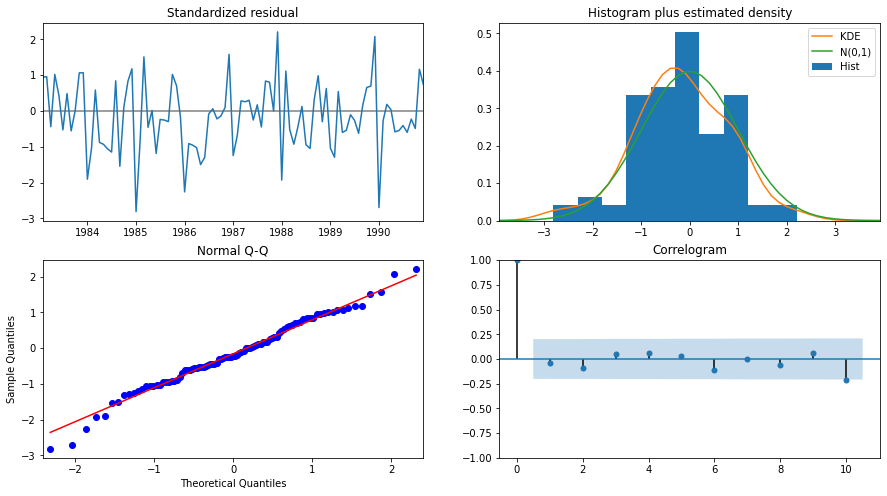

In [205]:
auto_SARIMA.plot_diagnostics()
plt.show()

In [206]:
auto_SARIMA_predict=auto_SARIMA.forecast(steps=(len(test2)))

In [207]:
auto_SARIMA_RMSE=np.round(metrics.mean_squared_error(test2['Rose'],auto_SARIMA_predict,squared=False),2)
auto_SARIMA_RMSE

34.36

In [208]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [auto_SARIMA_RMSE]}
                           ,index=['Auto SARIMA model(order(3,1,3),seasonal order(3,0,1,11))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857
"Auto ARIMA model(order(2,1,3))",36.840000
"Auto SARIMA model(order(3,1,3),seasonal order(3,0,1,11))",34.360000


# Question 7

1) Manual ARIMA model

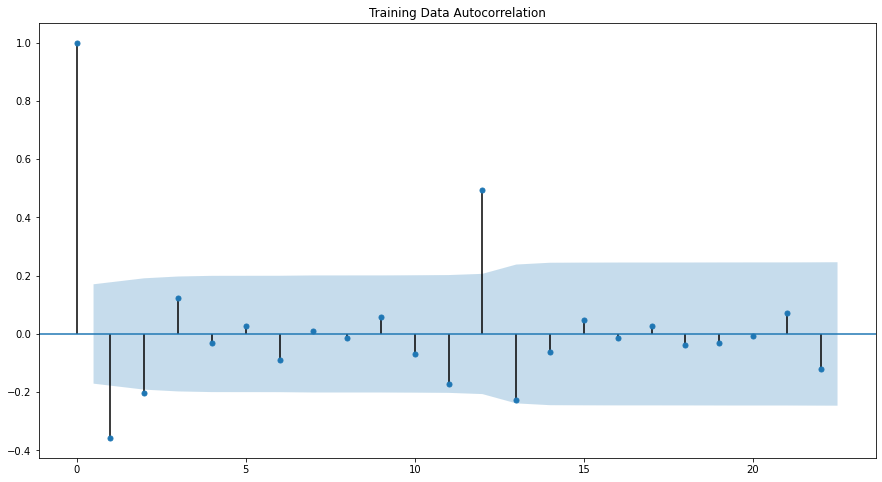

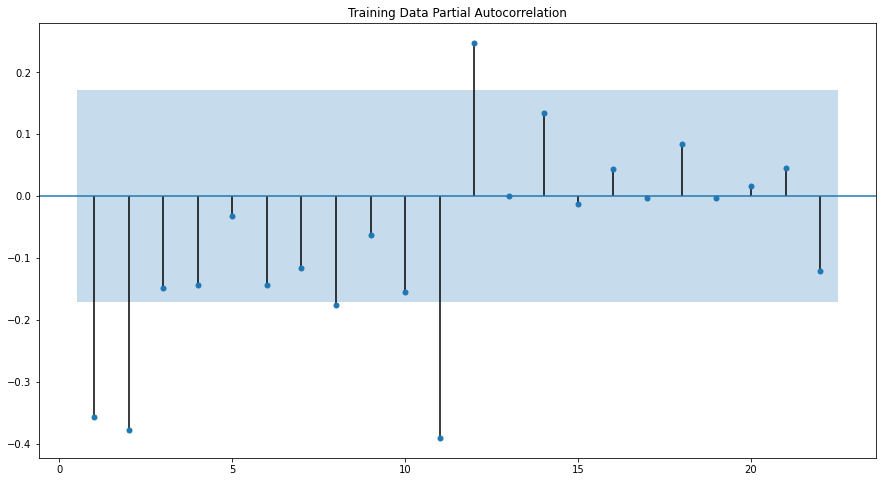

In [209]:
plot_acf(train2.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train2.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [210]:
manual_ARIMA = ARIMA(train2['Rose'], order=(2,1,2))

manual_ARIMA = manual_ARIMA.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


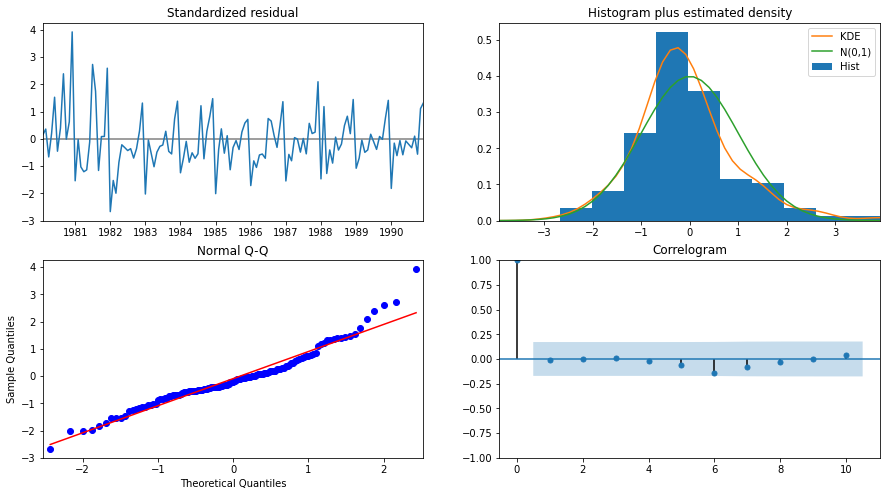

In [211]:
manual_ARIMA.plot_diagnostics();

In [212]:
manual_ARIMA_predict = manual_ARIMA.forecast(steps=len(test2))

In [213]:
manual_ARIMA_RMSE=np.round(metrics.mean_squared_error(test2['Rose'],manual_ARIMA_predict,squared=False),2)
manual_ARIMA_RMSE

36.89

In [214]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [manual_ARIMA_RMSE]}
                           ,index=['manual ARIMA model(order(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857
"Auto ARIMA model(order(2,1,3))",36.840000
"Auto SARIMA model(order(3,1,3),seasonal order(3,0,1,11))",34.360000
"manual ARIMA model(order(2,1,2)",36.890000


2) Manual SARIMA Model

In [215]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train2['Rose'],
                                order=(3, 1, 3),
                                seasonal_order=(0,0,11,22),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
manual_SARIMA=manual_SARIMA.fit()

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [216]:
manual_SARIMA_predict = manual_SARIMA.forecast(steps=len(test2))

In [217]:
manual_SARIMA_RMSE=np.round(metrics.mean_squared_error(test2['Rose'],manual_SARIMA_predict,squared=False),2)
manual_SARIMA_RMSE

66.61

In [218]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [manual_SARIMA_RMSE]}
                           ,index=['manual SARIMA model(order(2,1,2),seasonal order(0,0,11,22))'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857
"Auto ARIMA model(order(2,1,3))",36.840000
"Auto SARIMA model(order(3,1,3),seasonal order(3,0,1,11))",34.360000
"manual ARIMA model(order(2,1,2)",36.890000


# Question 8

In [231]:
DF2=resultsDf
DF2

,Test RMSE
SES: Alpha=0.09,37.000000
"DES: Alpha=0.15, Beta=0,15",70.600000
"TES: Alpha=0.13, Beta=0.013, Gamma=0",362.720000
"TES: Alpha=0.106, Beta=0.048, Gamma=0",17.000000
Linear Regression,15.000000
Naive modle,80.000000
Simple average model,53.480857
"Auto ARIMA model(order(2,1,3))",36.840000
"Auto SARIMA model(order(3,1,3),seasonal order(3,0,1,11))",34.360000
"manual ARIMA model(order(2,1,2)",36.890000


# Question 9

In [233]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_wine['Rose'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 1,11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=50)

C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\nicky\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [234]:
predicted_auto_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [235]:
pred_full_auto_SARIMA_date = predicted_auto_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_auto_SARIMA_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,51.709634,21.089768,10.374448,93.044819
1995-09-01,51.049711,21.363923,9.177192,92.922230
1995-10-01,38.184378,21.404736,-3.768134,80.136889
1995-11-01,44.181390,21.627924,1.791437,86.571342
1995-12-01,52.799143,21.835805,10.001752,95.596534
1996-01-01,48.955481,21.945114,5.943848,91.967113
1996-02-01,46.406292,21.946433,3.392074,89.420510
1996-03-01,46.341953,22.005910,3.211161,89.472744
1996-04-01,51.629679,22.237744,8.044501,95.214858
1996-05-01,49.696122,22.634348,5.333615,94.058628


In [236]:
Full_data_rmse =np.round (metrics.mean_squared_error(rose_wine['Rose'],results_full_data_model.fittedvalues,squared=False),2)
Full_data_rmse

45.35